# Trail One Model, One Image
# 2021-01-22


## Intro


todo: move to note.py


## import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plt.style.use("bmh")

import cv2
import tensorflow as tf






In [124]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plt.style.use("bmh")

import cv2
import tensorflow as tf

from datetime import datetime
import seaborn as sns

import errno

# from adabelief_tf import AdaBeliefOptimizer

In [125]:
print(tf.__version__)
print(cv2.__version__)

2.3.1
4.3.0


### 1. EDA

a simple Exploratory Data Analysis

In [126]:
def get_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def get_img_by_id(df_index):
    img_name = df.iloc[df_index, 0] # [index, table] or [row, columns]
    t_img_p = 'train/images/' + img_name
    return get_img(t_img_p)

    
def what_dtype(data):
    return print(f'dtype: {data.dtype}, shape: {data.shape}')
    
def plt_img(img):
    #plt.figure(figsize=(6,6))
#     plt.title(f'dtype: {img.dtype}')
    plt.axis("off")
    plt.imshow(img)

def plt_points(img, x, y):
    cv2.circle(img, (x,y), 3, (0,0,213), -1)
    
def cvshow_img(img):
    """cvshow_img(img) display imgage with OS's app window not in the notebook."""
    cv2.imshow('cv image', img)
    cv2.waitKey(500)
    cv2.destroyAllWindows()

dtype: uint8, shape: (400, 120, 3)


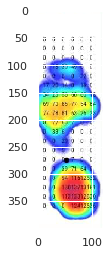

In [127]:
t_img_p = 'train/images/image_0001.png'
img = get_img(t_img_p)
plt.figure()
plt.imshow(img)

what_dtype(img)

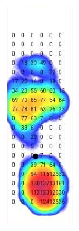

In [128]:
plt_img(img)

In [129]:
ann = 'train/annotation.csv'
df = pd.read_csv(ann)

### 

In [130]:
df.head()

images  x1   y1  x2   y2
0  image_0001.png  55  136  75  383
1  image_0002.png  62  139  42  385
2  image_0003.png  47  117  76  368
3  image_0004.png  66  119  37  376
4  image_0005.png  58  147  85  381

In [131]:
df.describe()

x1           y1          x2           y2
count  1000.000000  1000.000000  1000.00000  1000.000000
mean     57.679000   133.471000    54.78000   377.934000
std       8.145693    14.154629    24.19804     7.757049
min      24.000000    99.000000    10.00000   334.000000
25%      53.000000   122.750000    31.00000   375.000000
50%      58.000000   136.000000    53.50000   381.000000
75%      62.250000   142.000000    78.00000   383.000000
max      84.000000   182.000000    96.00000   387.000000

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
images    1000 non-null object
x1        1000 non-null int64
y1        1000 non-null int64
x2        1000 non-null int64
y2        1000 non-null int64
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [133]:
df.columns

Index(['images', 'x1', 'y1', 'x2', 'y2'], dtype='object')

In [134]:
df.shape

(1000, 5)

In [135]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [136]:
df.iloc[0:2,:]

images  x1   y1  x2   y2
0  image_0001.png  55  136  75  383
1  image_0002.png  62  139  42  385

In [137]:
print(f'df list size : {len(df)}, Index: {df.index}')

df_index = 0
print(f'Image: {df.images[df_index]} x1:{df.x1[df_index]} y1:{df.y1[df_index]} x1:{df.x2[df_index]} y1:{df.y2[df_index]}')

df list size : 1000, Index: RangeIndex(start=0, stop=1000, step=1)
Image: image_0001.png x1:55 y1:136 x1:75 y1:383


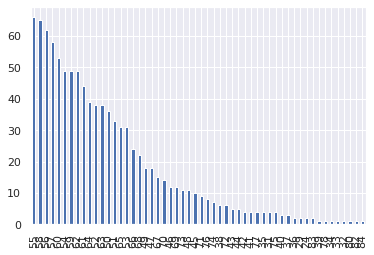

In [138]:
df.x1.value_counts().plot(kind="bar")

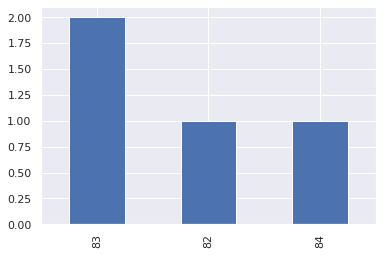

In [139]:
df[df.x1 > 80].x1.value_counts().plot(kind="bar")

In [140]:
# the range of pp points.
print(f'x1: {df.x1.min()} ~ {df.x1.max()},\t mean: {df.x1.mean()},\t x1-bound-len: {df.x1.max() - df.x1.min()}')
print(f'y1: {df.y1.min()} ~ {df.y1.max()},\t mean: {df.y1.mean()},\t y1-bound-len: {df.y1.max() - df.y1.min()}')
print(f'x2: {df.x2.min()} ~ {df.x2.max()},\t mean: {df.x2.mean()},\t x2-bound-len: {df.x2.max() - df.x2.min()}')
print(f'y2: {df.y2.min()} ~ {df.y2.max()},\t mean: {df.y2.mean()},\t y2-bound-len: {df.y2.max() - df.y2.min()}')

x1: 24 ~ 84,	 mean: 57.679,	 x1-bound-len: 60
y1: 99 ~ 182,	 mean: 133.471,	 y1-bound-len: 83
x2: 10 ~ 96,	 mean: 54.78,	 x2-bound-len: 86
y2: 334 ~ 387,	 mean: 377.934,	 y2-bound-len: 53


Although the limit bound of x12, y12 are lower than 100 pixels, using the same dimension of the x-axis (width of the whole heel) may better fit the 'heel''s left and right phenomena.

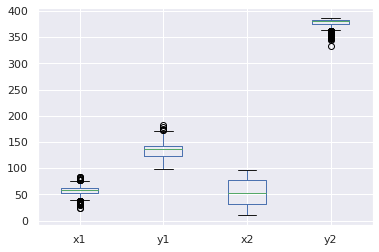

In [141]:
df[1:].plot(kind='box')

CPU times: user 2.62 s, sys: 14.4 ms, total: 2.64 s
Wall time: 2.61 s


Text(0.5, 1.0, 'Scatter Plot')

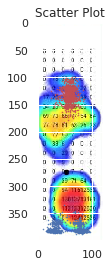

In [142]:
%%time
# plt.figure(figsize=(1.2,4.0))
# plt.xlim(0,120)
# plt.ylim(0,400)
# plt_img(img)

plt.imshow(img)
for df_index in range(1000):
    plt.plot(df.x1[df_index], df.y1[df_index], 'r.', markersize=1)
    plt.plot(df.x2[df_index], df.y2[df_index], 'b.', markersize=1)
plt.title("Scatter Plot")

In [143]:
# check y1 range
df[df.y1 > 180]

images  x1   y1  x2   y2
662  image_0663.jpg  48  182  53  383

### 正確分佈
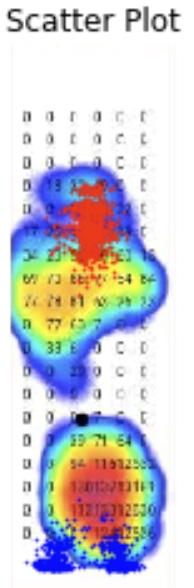


x1y1 55 136
x2y2 75 383
matplotlib/cv2以左上角原點，np以row,column對應則為：x=column, y=row


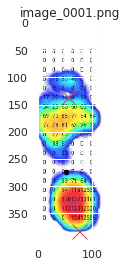

In [144]:
df_index = 0
img_name = df.iloc[df_index, 0] # [index, table] or [row, columns]

t_img_p = 'train/images/' + img_name
img = get_img(t_img_p)
plt.figure()
plt.imshow(img)
plt.plot(df.x1[df_index], df.y1[df_index], 'rx', markersize=15)
plt.plot(df.x2[df_index], df.y2[df_index], 'rx', markersize=15)
plt.title(img_name)

print('x1y1', df.x1[df_index], df.y1[df_index])
print('x2y2', df.x2[df_index], df.y2[df_index])
print('matplotlib/cv2以左上角原點，np以row,column對應則為：x=column, y=row')

CPU times: user 11.9 ms, sys: 1.95 ms, total: 13.8 ms
Wall time: 11.8 ms


Text(0.5, 1.0, 'Scatter Plot')

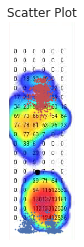

In [145]:
%%time
# plt.figure(figsize=(1.2,4.0))

plt_img(img)
plt.plot(df.x1, df.y1, 'r.', markersize=1)
plt.plot(df.x2, df.y2, 'b.', markersize=1)
plt.title("Scatter Plot")

# plt.xlim(0,120)
# plt.ylim(0,400)

CPU times: user 11.4 ms, sys: 1.38 ms, total: 12.7 ms
Wall time: 10.2 ms


Text(0.5, 1.0, 'Scatter Plot upside down')

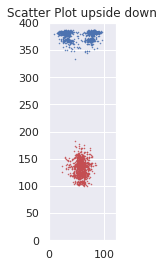

In [146]:
%%time
plt.figure(figsize=(1.2,4.0))
plt.ylim(0,400)
plt.xlim(0,120) #somehow add the x-ylim cause the upside down.

# plt_img(img)
plt.plot(df.x1, df.y1, 'r.', markersize=1)
plt.plot(df.x2, df.y2, 'b.', markersize=1)
plt.title("Scatter Plot upside down")

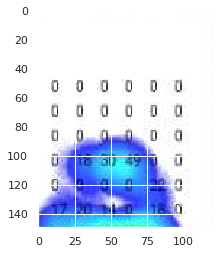

In [147]:
# 注意toe切割，要以y1最大範圍為準. y1: 99 ~ 182,	 mean: 133.471

# When image[x,y], 
# if array[row, column] = [0:150, 0:200]

plt.imshow(img[0:150, 0:200])

In [148]:
def plt_ud_points(df_index):
    img_name = df.iloc[df_index, 0] # [index, table] or [row, columns]

    t_img_p = 'train/images/' + img_name
    img = get_img(t_img_p)
#     plt.figure()
    plt.imshow(img)
    plt.plot(df.x1[df_index], df.y1[df_index], 'r+', markersize=15)
    plt.plot(df.x2[df_index], df.y2[df_index], 'b+', markersize=15)
    plt.axis("off")
    plt.title(img_name)

def plt_ud_points_lines(df_index):
    img_name = df.iloc[df_index, 0] # [index, table] or [row, columns]

    t_img_p = 'train/images/' + img_name
    img = get_img(t_img_p)
#     plt.figure()
    plt.imshow(img)
    plt.plot(df.x1[df_index], df.y1[df_index], 'r+', markersize=15, mew=3)
    plt.plot(df.x2[df_index], df.y2[df_index], 'b+', markersize=15, mew=3)
    # line
    x = [df.x1[df_index], df.x2[df_index]]
    y = [df.y1[df_index], df.y2[df_index]]
    plt.plot(x, y, 'k-', lw=3)
    
    plt.axis("off")
    plt.title(img_name)
    
def plt_ud_point(df_index):
    img_name = df.iloc[df_index, 0] # [index, table] or [row, columns]

    t_img_p = 'train/images/' + img_name
    img = get_img(t_img_p)
    plt.figure()
    plt.imshow(img)
    plt.plot(df.x1[df_index], df.y1[df_index], 'r+', markersize=15)
    plt.plot(df.x2[df_index], df.y2[df_index], 'b+', markersize=15)
    print(f'up[{df.x1[df_index]}, {df.y1[df_index]}], down[{df.x2[df_index]}, {df.y2[df_index]}]')
    plt.axis("off")
    plt.title(img_name)

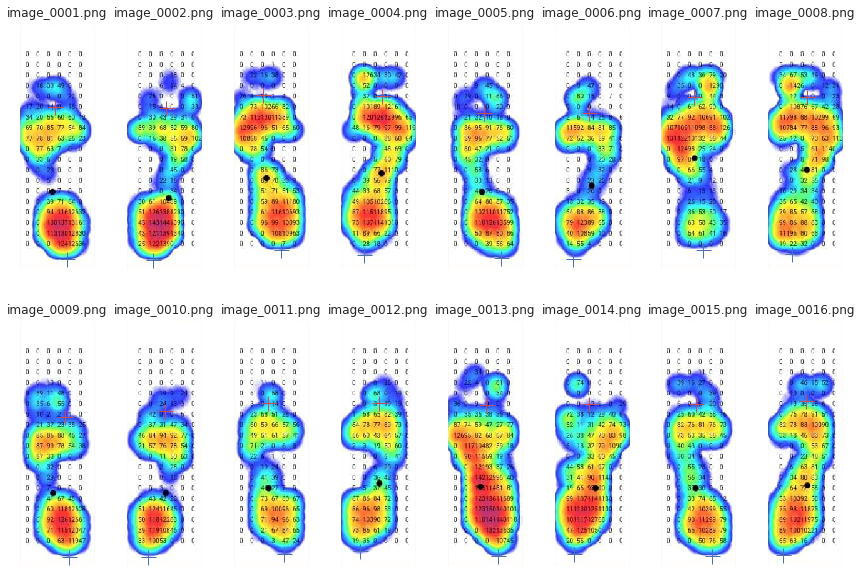

In [149]:
"""
image_0205.jpg 僅有右腳 打亂後面的12左右 34左右排序
"""

"""
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing non-integers 
as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

plt.subplot(cr/2, cr*2, i-step+1) ->>  plt.subplot(int(cr/2), int(cr*2), int(i-step+1))
"""
head_num = 16
step = 0 # each 10s
col_row = np.sqrt(int(head_num))
cr = col_row

plt.figure(figsize=(15, 10))
for i in range(step, step+head_num):
    if step > 200:
        ax = plt.subplot(int(cr/2), int(cr*2), int(i-step+1))
    else:
        ax = plt.subplot(int(cr/2), int(cr*2), int(i-step+1))
    plt_ud_points(i)


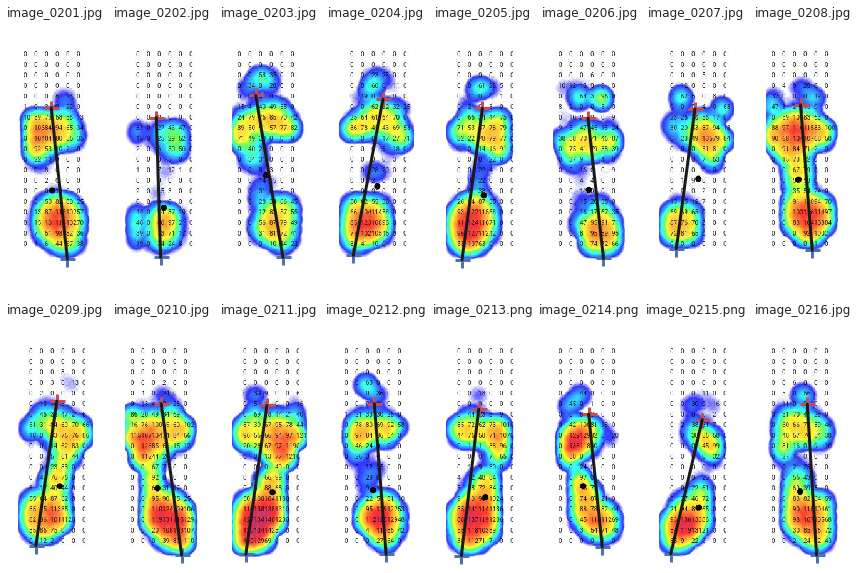

In [150]:
"""
image_0205.jpg 僅有右腳 打亂後面的12左右 34左右排序
"""
head_num = 16
step = 200 # each 10s
col_row = np.sqrt(int(head_num))
cr = col_row

plt.figure(figsize=(15, 10))
for i in range(step, step+head_num):
    if step > 200:
        ax = plt.subplot(int(cr/2), int(cr*2), int(i-step+1))
    else:
        ax = plt.subplot(int(cr/2), int(cr*2), int(i-step+1))
    plt_ud_points_lines(i)


CPU times: user 5.66 s, sys: 148 ms, total: 5.81 s
Wall time: 5.76 s


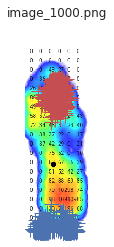

In [151]:
%%time
for i in range(1000):
    plt_ud_points(i)

up[50, 154], down[57, 380]


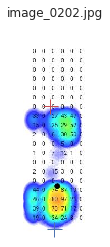

In [152]:
plt_ud_point(201)

up[63, 137], down[38, 381]


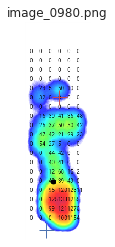

In [153]:
#image_0980.png is wrong data.
plt_ud_point(980-1)

### trail 1
        (1) band rejection (排除黑字和黑點)
        (2) median filter (黑字和黑點補色)
        (3) color conversion (將彩色轉換成壓力)

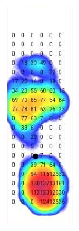

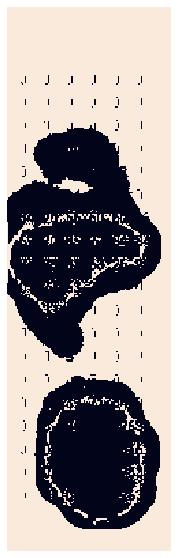

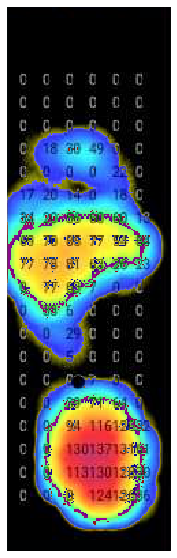

In [154]:
# org image
t_img_p = 'train/images/' + img_name
img = get_img(t_img_p)
# plt.figure(figsize=(15, 10))
plt.figure()
plt_img(img)


# mask some color
t_img_p = 'train/images/' + img_name
img = get_img(t_img_p)

# create NumPy arrays from the boundaries
lower = [100, 100, 100]
upper = [255, 255, 255]
lower = np.array(lower, dtype = "uint8")
upper = np.array(upper, dtype = "uint8")
# find the colors within the specified boundaries and apply
# the mask
mask = cv2.inRange(img, lower, upper)
plt.figure(figsize=(3,10))
plt_img(mask)


# output = cv2.bitwise_and(img, img, mask = mask)
output = cv2.bitwise_not(img, img, mask = mask)
plt.figure(figsize=(3,10))
plt_img(output)



### 左右判斷
依據足跟分佈靠左靠右則為右腳左腳

取ROI投影於x軸上，取分佈重心位置。

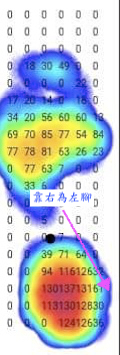

<Figure size 1080x720 with 0 Axes>

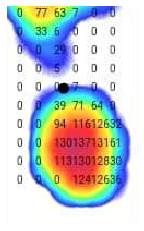

In [155]:
# crop Heel (the lower part of image) #
img = get_img_by_id(0)

# crop location
x=200
y=0
w=400
h=120

# crop location, rows, columns
row=200
col=0
rows=400
cols=120


# crop_image = img[x:w, y:h]
crop_image = img[row:rows, col:cols]


# cv2.imshow("Cropped", crop_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(15, 10))
plt.figure()
plt_img(crop_image)

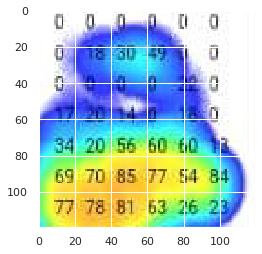

In [156]:
# 注意toe切割，要以y1最大範圍為準. y1: 99 ~ 182,	 mean: 133.471

# When image[x,y], 
# if array[row, column] = [0:150, 0:120]

# plt.imshow(img[0:150, 0:120])
plt.imshow(img[80:200, 0:120])
# plt.imshow(img[y_offset_toe:y_offset_toe+120, 0:120])

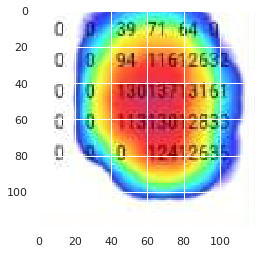

In [157]:
# heel
plt.imshow(img[280:280+120, 0:120])

# plt.imshow(img[y_offset_heel:y_offset_heel+120, 0:120])

### 2. Parameters

#### Image size, Batch size, toe/heel-offset.

In [158]:
# BATCH_SIZE = 64 #128 #32 #64 #todo: reduce the BS maybe help to reduce the loss
# img_height = 120 #512 #224 #100
# img_width = 120 #512 #224 #100

# y_offset_toe = 80
# y_offset_heel = 280 #400-120=280


# One Model #
BATCH_SIZE = 8# 64 # 16 #128 #32 #64 #todo: reduce the BS maybe help to reduce the loss
img_height = 400 #120 #512 #224 #100
img_width = 120 #120 #512 #224 #100

# y_offset_toe = 80
# y_offset_heel = 280 #400-120=280

#### tf MirroredStrategy seting

In [159]:

# tf MirroredStrategy seting
strategy = tf.distribute.MirroredStrategy()
REPLICAS = strategy.num_replicas_in_sync
print('\nNumber of REPLICAS: {}\n'.format(REPLICAS))


MULTI_BATCH_SIZE = BATCH_SIZE * strategy.num_replicas_in_sync
print('BATCH_SIZE: {}, MULTI_BATCH_SIZE: {}'.format(BATCH_SIZE, MULTI_BATCH_SIZE))



INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3', '/job:localhost/replica:0/task:0/device:GPU:4', '/job:localhost/replica:0/task:0/device:GPU:5', '/job:localhost/replica:0/task:0/device:GPU:6', '/job:localhost/replica:0/task:0/device:GPU:7')

Number of REPLICAS: 8

BATCH_SIZE: 8, MULTI_BATCH_SIZE: 64


In [160]:
# 自動調節tf.data管道
AUTOTUNE = tf.data.experimental.AUTOTUNE

### 3. Create the training dataset W/ croped


#### Load samples as data-farame

In [161]:
# data-train #
# ann = 'annotation_1345_good.csv'
# im_p = 'train/images/'

# # data-augm #
# ann = 'annotation_2690_augm.csv'
# im_p = 'train_augm/images/'

# data-HPL  #
ann = 'annotation_1123_HPL_Good.csv'
im_p = 'train/images/'


df = pd.read_csv(ann)
df[1335:]

Empty DataFrame
Columns: [images, x1, y1, x2, y2]
Index: []

#### Shuffle list data-frame 

In [162]:
# keep index
# df = df.sample(frac=1) #
# df.head(5)

In [163]:
# reset index
df = df.sample(frac=1).reset_index(drop=True)

In [164]:
df.head(10)

images  x1   y1  x2   y2
0  image_0830.png  66  144  79  385
1  image_0312.png  60  143  45  348
2  image_0595.jpg  52  120  36  381
3  image_6071.png  60  121  70  383
4  image_0975.png  56  122  32  378
5  image_0249.png  54  115  30  386
6  image_6208.jpg  55  122  33  382
7  image_0583.jpg  52  103  35  384
8  image_6293.jpg  54  122  83  383
9  image_0163.png  56  119  76  384

See, the image_####.jpg now are random.

#### Create tf.dataset (DS)

In [165]:
# from dataframe
list_ds = tf.data.Dataset.from_tensor_slices((df['images'], df['x1'], df['y1'], df['x2'], df['y2']))
# list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=True) #todo: move to ds_pre. see https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle

In [166]:
len(list_ds)#.shape() #take(1)

1123

In [167]:
# check The type specification of an element of this dataset.
list_ds.element_spec


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [168]:
for f,x1,y1,x2,y2 in list_ds.take(5):
    print(f'take sample: {f} {x1} {y1} {x2} {y2}')

take sample: b'image_0830.png' 66 144 79 385
take sample: b'image_0312.png' 60 143 45 348
take sample: b'image_0595.jpg' 52 120 36 381
take sample: b'image_6071.png' 60 121 70 383
take sample: b'image_0975.png' 56 122 32 378


In [169]:
# use np decode to UTF-8
print(f.numpy().decode('UTF-8'))

image_0975.png


In [170]:
len(list_ds)

1123

#### Check ds iterator for consuming

In [171]:
# create a Python iterator

it_list_ds = iter(list_ds) # Make sure iter ds only once.

In [172]:
# using iter and consuming its elements using next: every print different image name.

for i in range(4):
    image, x1, y1, x2, y2 = next(it_list_ds)
    print(image.numpy(), x1.numpy(), y1.numpy())

b'image_0830.png' 66 144
b'image_0312.png' 60 143
b'image_0595.jpg' 52 120
b'image_6071.png' 60 121


In [173]:
# image_batch, label_batch = valid_ds_pre_s.as_numpy_iterator().next()
# pred = model.predict_on_batch(image_batch)


for i in range(4):
    image, x1, y1, x2, y2 = list_ds.as_numpy_iterator().next()# every time create a new iter, so need put iter out of above cell.
    print(image, x1, y1, x2, y2)
    
iter_test_list = list_ds.as_numpy_iterator()
print("===== Create iterator once and pull out to above cell. =====")
for i in range(4):
    image, x1, y1, x2, y2 = iter_test_list.next()
    print(image, x1, y1, x2, y2)


b'image_0830.png' 66 144 79 385
b'image_0830.png' 66 144 79 385
b'image_0830.png' 66 144 79 385
b'image_0830.png' 66 144 79 385
===== Create iterator once and pull out to above cell. =====
b'image_0830.png' 66 144 79 385
b'image_0312.png' 60 143 45 348
b'image_0595.jpg' 52 120 36 381
b'image_6071.png' 60 121 70 383


#### Process path to image tensor in DS

In [174]:

'''
def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    # The second to last is the class-directory
    boolen = parts[-2] == class_names
    #one_hot_num = np.array(boolen, dtype=np.int) not works should use tf.x repalced.
    one_hot_num = tf.dtypes.cast(boolen, tf.int64)
    one_num = tf.argmax(one_hot_num)
    print('one_num:', one_num)
    # Integer encode the label
    return one_num

def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_jpeg(img, channels=3)
    # resize the image to the desired size
#     return tf.image.resize(img, [img_height, img_width])# augment 已經resize過一次了 但這邊不先做會比較慢
    return tf.cast(tf.image.resize(img, [img_height, img_width]), tf.uint8)# 避免float over at augment
'''

#
# map list to ds, [ONE MODEL].
#

def decode_crop_png(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_png(img, channels=3)
#     # crop the toe from top-left corner [image, offset_height y1, offset_width x1, target_height, target_width]
#     y1=y_offset_toe;    x1=0;    h=img_height;    w=img_width # not the pp location
#     img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), h, w)
    return img

def process_path(file_path,x1,y1,x2,y2):
    file_path = im_p + file_path
    #label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)#can read the byte string paths b'image_0001.png'
    img = decode_crop_png(img)
#     return img, [x1,y1,x2,y2] # or img, [x1,y1], [x2,y2]
#     return img, [[x1,y1], [x2,y2]] # for mean_ed_2d_ONE() loss, change to MAE [x1,y1,x2,y2] mode
    return img, [x1,y1,x2,y2] # for MAE loss




# #
# # map list to ds, Toe part.
# #

# def decode_crop_png_toe(img):
#     # convert the compressed string to a 3D uint8 tensor
#     img = tf.io.decode_png(img, channels=3)
#     # crop the toe from top-left corner [image, offset_height y1, offset_width x1, target_height, target_width]
#     y1=y_offset_toe;    x1=0;    h=img_height;    w=img_width # not the pp location
#     img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), h, w)
#     #img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), int(y2)-int(y1), int(x2)-int(x1))
#     # resize the image to the desired size
#     return img

# def process_path_toe(file_path,x1,y1,x2,y2):
#     file_path = im_p + file_path
#     #label = get_label(file_path)
#     # load the raw data from the file as a string
#     img = tf.io.read_file(file_path)#can read the byte string paths b'image_0001.png'
#     img = decode_crop_png_toe(img)
#     return img, [x1,y1-y_offset_toe]

# #
# # map list to ds, Heel part.
# #

# def decode_crop_png_heel(img):
#     # convert the compressed string to a 3D uint8 tensor
#     img = tf.io.decode_png(img, channels=3)
#     # crop the toe from top-left corner [image, offset_height y1, offset_width x1, target_height, target_width]
#     y2=y_offset_heel;    x2=0;    h=img_height;    w=img_width # not the pp location
#     img = tf.image.crop_to_bounding_box(img, int(y2), int(x2), h, w)
#     #img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), int(y2)-int(y1), int(x2)-int(x1))
#     # resize the image to the desired size
#     return img

# def process_path_heel(file_path,x1,y1,x2,y2):
#     file_path = im_p + file_path
#     #label = get_label(file_path)
#     # load the raw data from the file as a string
#     img = tf.io.read_file(file_path)#can read the byte string paths b'image_0001.png'
#     img = decode_crop_png_heel(img)
#     return img, [x2,y2-y_offset_heel]


# #
# # test how to put parameters to map
# #

# def t_ds_map(file_path,x1,y1,x2,y2):
# #     img = get_img('train/images/' + str(file_path))
# #     print(file_path)
#     return file_path,x1,y1,x2,y2 #img, [x1,y1]
    

In [175]:
# ONE DS
train_ds_map = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

# # Toe ds
# train_ds_map_toe = list_ds.map(process_path_toe, num_parallel_calls=AUTOTUNE)

# # Heel ds
# train_ds_map_heel = list_ds.map(process_path_heel, num_parallel_calls=AUTOTUNE)

In [176]:
# ONE MODEL #
# # ppxy = [[x1,y1], [x2,y2]]
# for img, ppxy in train_ds_map.take(1):
#     print(f'take sample: {f} {ppxy}')
    
# print('f', f.dtype)
# print('p1xy', ppxy[0].dtype)
# print('p2xy', ppxy[1].dtype)


# ppxy = [x1,y1,x2,y2]
for img, ppxy in train_ds_map.take(1):
    print(f'take sample: {f} {ppxy}')
    
print('f', f.dtype)
print('p1xy', ppxy.dtype)
print('p2xy', ppxy.dtype)

take sample: b'image_0975.png' [ 66 144  79 385]
f <dtype: 'string'>
p1xy <dtype: 'int64'>
p2xy <dtype: 'int64'>


In [177]:
ppxy

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([ 66, 144,  79, 385])>

In [178]:
# for f,x1,y1,x2,y2 in train_ds_map.take(5):
#     print(f'take sample: {f} {x1} {y1} {x2} {y2}')

#### [new] Split train_ds_pre with ratio of validation %

In [179]:
# split ONE MODEL DS #
val_size = int(tf.data.experimental.cardinality(train_ds_map).numpy() * 0.2)

train_ds_map_s = train_ds_map.skip(val_size)
valid_ds_map_s = train_ds_map.take(val_size)

print(len(train_ds_map))
print(val_size)
print(tf.data.experimental.cardinality(train_ds_map_s).numpy())
print(tf.data.experimental.cardinality(valid_ds_map_s).numpy())

1123
224
899
224


In [180]:
# # split Toe
# val_size = int(tf.data.experimental.cardinality(train_ds_map_toe).numpy() * 0.2)

# train_ds_map_toe_s = train_ds_map_toe.skip(val_size)
# valid_ds_map_toe_s = train_ds_map_toe.take(val_size)

# print(len(train_ds_map_toe))
# print(val_size)
# print(tf.data.experimental.cardinality(train_ds_map_toe_s).numpy())
# print(tf.data.experimental.cardinality(valid_ds_map_toe_s).numpy())

In [181]:
# # split Heel
# val_size = int(tf.data.experimental.cardinality(train_ds_map_heel).numpy() * 0.2)

# train_ds_map_heel_s = train_ds_map_heel.skip(val_size)
# valid_ds_map_heel_s = train_ds_map_heel.take(val_size)

# print(len(train_ds_map_heel))
# print(val_size)
# print(tf.data.experimental.cardinality(train_ds_map_heel_s).numpy())
# print(tf.data.experimental.cardinality(valid_ds_map_heel_s).numpy())

#### prepare train_ds_prefetch

In [182]:
def configure_for_performance_cache_train(ds, cache=True, augment=False):

    
    """#TODO: need to check the parse logic of ds.cache.
    if cache:
        print("Check cache-f1 to file:", cache)
        if isinstance(cache, str):
            ds = ds.cache(cache)
            print("Check cache-f2 to file:", cache)
    else:
        ds = ds.cache()
        print("Check cache in memory:", cache)
    """    
    if cache:
        ds = ds.cache()
        print("Check cache in memory:Y", cache)
    else:
        print("Check cache in memory:N", cache)
        
    if augment:
#         ds = ds.map(data_augment, num_parallel_calls=AUTOTUNE)
        ds = ds.map(AA, num_parallel_calls=AUTOTUNE)
#         ds = ds.map(RA, num_parallel_calls=AUTOTUNE)
        print("Check augment :Y", augment)
    else:
        print("Check augment :N", augment)
    
    #ds = ds.repeat()#TODO:2020-12-14: test
    #ds = ds.shuffle(buffer_size=MULTI_BATCH_SIZE*2) # (buffer_size=MULTI_BATCH_SIZE*5) 6sec,buffer_size=1000 take few sec. or buffer_size=image_count <- take too long # each take ds take 30~45 sec, TODO!!
    ds = ds.shuffle(len(list_ds), reshuffle_each_iteration=True) #todo: move to ds_pre. see https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
    ds = ds.batch(MULTI_BATCH_SIZE)#MULTI_BATCH_SIZE for multi-GPUs
    ds = ds.prefetch(buffer_size=AUTOTUNE) #buffer_size=AUTOTUNE seem no speed improve
    
    print("Check ds cache[{}] and augment[{}]".format(cache, augment))
    
    return ds

def configure_for_performance_cache_val(ds, cache=True, augment=False):

    
    """#TODO: need to check the parse logic of ds.cache
    TODO:test remove ds.shuffle from val_ds.
    .
    if cache:
        print("Check cache-f1 to file:", cache)
        if isinstance(cache, str):
            ds = ds.cache(cache)
            print("Check cache-f2 to file:", cache)
    else:
        ds = ds.cache()
        print("Check cache in memory:", cache)
    """    
    if cache:
        ds = ds.cache()
        print("Check cache in memory:Y", cache)
    else:
        print("Check cache in memory:N", cache)
        
    if augment:
#         ds = ds.map(data_augment, num_parallel_calls=AUTOTUNE)
        ds = ds.map(AA, num_parallel_calls=AUTOTUNE)
#         ds = ds.map(RA, num_parallel_calls=AUTOTUNE)
        print("Check augment :Y", augment)
    else:
        print("Check augment :N", augment)
    
    #ds = ds.repeat()#TODO:2020-12-14: test
    #ds = ds.shuffle(buffer_size=MULTI_BATCH_SIZE*2) # (buffer_size=MULTI_BATCH_SIZE*5) 6sec,buffer_size=1000 take few sec. or buffer_size=image_count <- take too long # each take ds take 30~45 sec, TODO!!
#     ds = ds.shuffle(len(list_ds), reshuffle_each_iteration=False) #todo: move to ds_pre. see https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
    ds = ds.batch(MULTI_BATCH_SIZE)#MULTI_BATCH_SIZE for multi-GPUs
    ds = ds.prefetch(buffer_size=AUTOTUNE) #buffer_size=AUTOTUNE seem no speed improve
    
    print("Check ds cache[{}] and augment[{}]".format(cache, augment))
    
    return ds


In [183]:
# """
# Prepare the ds properties (cache, augment, bs, shuffle, prefetch, etc.) for better performance.
# """
# # Toe ds_pre
# train_ds_pre_toe = configure_for_performance_cache_train(train_ds_map_toe)

# # Heel ds_pre
# train_ds_pre_heel = configure_for_performance_cache_val(train_ds_map_heel)

#### All split ds_prefetch
* train_ds_map_toe_s = train_ds_map_toe.skip(val_size)
* valid_ds_map_toe_s = train_ds_map_toe.take(val_size)

* train_ds_map_heel_s = train_ds_map_heel.skip(val_size)
* valid_ds_map_heel_s = train_ds_map_heel.take(val_size)


In [184]:
"""
Prepare the ds properties (cache, augment, bs, shuffle, prefetch, etc.) for better performance.
"""
# ONE ds_pre
train_ds_pre_s = configure_for_performance_cache_train(train_ds_map_s)
valid_ds_pre_s = configure_for_performance_cache_val(valid_ds_map_s)


Check cache in memory:Y True
Check augment :N False
Check ds cache[True] and augment[False]
Check cache in memory:Y True
Check augment :N False
Check ds cache[True] and augment[False]


In [185]:
# """
# Prepare the ds properties (cache, augment, bs, shuffle, prefetch, etc.) for better performance.
# """
# # Toe ds_pre
# train_ds_pre_toe_s = configure_for_performance_cache_train(train_ds_map_toe_s)
# valid_ds_pre_toe_s = configure_for_performance_cache_val(valid_ds_map_toe_s)

# # Heel ds_pre
# train_ds_pre_heel_s = configure_for_performance_cache_train(train_ds_map_heel_s)
# valid_ds_pre_heel_s = configure_for_performance_cache_val(valid_ds_map_heel_s)

#### Check ds_prefetch samples

In [186]:
# %%time

# # plot_number_of_sample = MULTI_BATCH_SIZE
# # col_size = row_size = int(np.sqrt(MULTI_BATCH_SIZE))
# # # row_size = np.sqrt(MULTI_BATCH_SIZE)
# # print(col_size)

# plt.figure(figsize=(8, 8))
# for images, labels in train_ds_pre_toe_s.take(1):
#     print('batch * multi:', len(labels), ', MULTI_BATCH_SIZE=', MULTI_BATCH_SIZE)
#     for i in range(16):
#         ax = plt.subplot(4, 4, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title([labels[i].numpy()])
#         plt.axis("off")
        
#         plt.plot(labels[i].numpy()[0], labels[i].numpy()[1], 'r+', markersize=13, mew=2.5)

In [187]:
# %%time

# plt.figure(figsize=(8, 8))
# for images, labels in train_ds_pre_heel_s.take(1):
#     print('batch * multi:', len(labels))
#     for i in range(16):
#         ax = plt.subplot(4, 4, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(str(labels[i].numpy()))
#         plt.axis("off")
        
#         plt.plot(labels[i].numpy()[0], labels[i].numpy()[1], 'b+', markersize=13, mew=2.5)
# #         print((labels[i].numpy()[0], labels[i].numpy()[1]))

In [188]:
# # create it_ds once
# it_train_ds_pre_toe = iter(train_ds_pre_toe_s)

In [189]:
# image_batch, label_batch = next(it_train_ds_pre_toe)

# plt.figure(figsize=(18, 18))
# for i in range(64):
#     ax = plt.subplot(8, 8, i + 1)
#     plt.imshow(image_batch[i].numpy().astype("uint8"))
#     plt.title('x1,y1:' + str(label_batch[i].numpy()))
#     plt.axis("off")
    
#     #print(label_batch[i])
#     plt.plot(label_batch[i].numpy()[0], label_batch[i].numpy()[1], 'r+', markersize=13, mew=2.5)

In [190]:
# create ONE_DS once
it_train_ds_pre_s = iter(train_ds_pre_s)

CPU times: user 1.86 s, sys: 148 ms, total: 2.01 s
Wall time: 781 ms


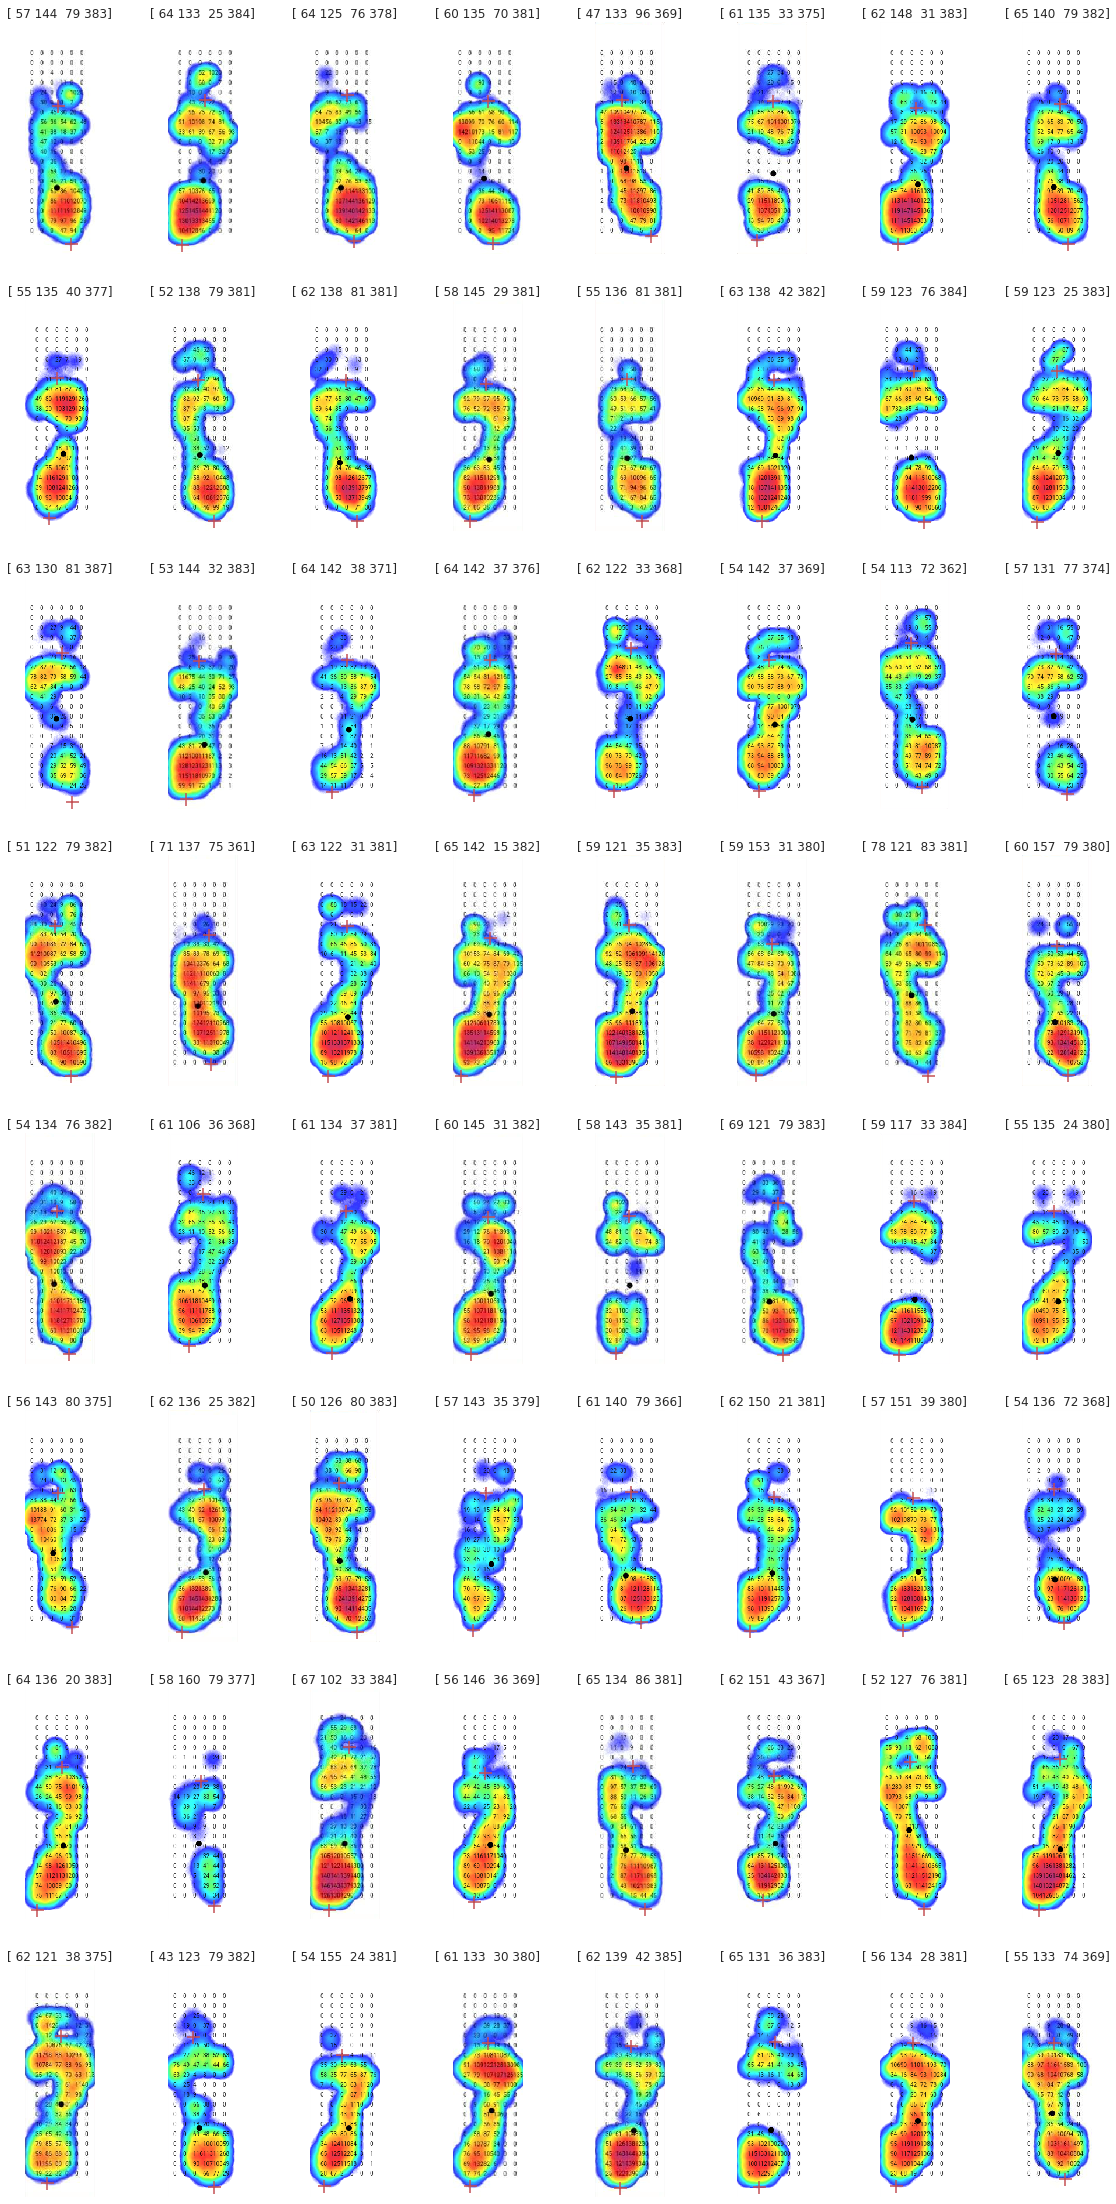

In [191]:
%%time

image_batch, ppxy_batch = next(it_train_ds_pre_s)

plt.figure(figsize=(20, 40))
for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(f'{ppxy_batch[i].numpy()}')
    plt.axis("off")

#     #ppxy = [[x1,y1], [x2,y2]]
#     plt.plot(ppxy_batch[i][0].numpy()[0], ppxy_batch[i][0].numpy()[1], 'r+', markersize=13, mew=1.5)
#     plt.plot(ppxy_batch[i][1].numpy()[0], ppxy_batch[i][1].numpy()[1], 'r+', markersize=13, mew=1.5)

    # ppxy = [x1,y1,x2,y2]
    plt.plot(ppxy_batch[i][0].numpy(), ppxy_batch[i][1].numpy(), 'r+', markersize=13, mew=1.5)
    plt.plot(ppxy_batch[i][2].numpy(), ppxy_batch[i][3].numpy(), 'r+', markersize=13, mew=1.5)

### [OLD] Split train_ds_pre

##### train_ds_pre_s
##### valid_ds_pre_s 

### re-set to toe/heel split
##### train_ds_pre_toe_s
##### valid_ds_pre_toe_s

##### train_ds_pre_heel_s
##### valid_ds_pre_heel_s

#### split Toe

In [192]:
# # split Toe
# val_size = int(tf.data.experimental.cardinality(train_ds_pre_toe).numpy() * 0.2)

# train_ds_pre_toe_s = train_ds_pre_toe.skip(val_size)
# valid_ds_pre_toe_s = train_ds_pre_toe.take(val_size)

# print(len(train_ds_pre_toe))
# print(val_size)
# print(tf.data.experimental.cardinality(train_ds_pre_toe_s).numpy())
# print(tf.data.experimental.cardinality(valid_ds_pre_toe_s).numpy())

#### split Heel

In [193]:
# # split Heel
# val_size = int(tf.data.experimental.cardinality(train_ds_pre_heel).numpy() * 0.2)

# train_ds_pre_heel_s = train_ds_pre_heel.skip(val_size)
# valid_ds_pre_heel_s = train_ds_pre_heel.take(val_size)

# print(len(train_ds_pre_heel))
# print(val_size)
# print(tf.data.experimental.cardinality(train_ds_pre_heel_s).numpy())
# print(tf.data.experimental.cardinality(valid_ds_pre_heel_s).numpy())

### 3.Loss function

* mae
* euclidean distance
* others


        # 'x' is [[1, 1, 1]
        #         [1, 1, 1]]
        tf.reduce_sum(x) ==> 6
        tf.reduce_sum(x, 0) ==> [2, 2, 2]
        tf.reduce_sum(x, 1) ==> [3, 3]
        the function is default for 2-D array, therefor, in our 1-D [x1,y1] to [x2,y2] the axis should be '0' or just leave it.
        
        tf.sqrt need 	A tf.Tensor of type bfloat16, half, float32, float64, complex64, complex128
        so, convert it first.

should be -> tf.Tensor([56 39], shape=(2,), dtype=int64)

In [194]:
y_true = [10, 10, 10, 10]
y_pred = [10, 20, 10, 10]


# y_true = [10, 10]
# y_pred = [10, 20]

# y_true = [1.00000000000000000000123, 10]
# y_pred = [1.0, 10.000000000000000000000000001]

# y_true = [1.0000123, 10]
# y_pred = [1.0, 10.0000321]


In [195]:
y_true

[10, 10, 10, 10]

In [196]:
# mae

loss_mae = tf.keras.losses.MAE(
    y_true, y_pred
)

loss_mae

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [197]:
# ed

# loss_ed = tf.sqrt(tf.reduce_sum(tf.square(tf.constant(y_true) - tf.constant(y_pred)), 0))

# loss_ed = tf.sqrt(tf.reduce_sum(tf.square(tf.Variable(y_true) - tf.Variable(y_pred)), 0))

loss_ed = tf.sqrt(tf.reduce_sum(tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32)), 0))

loss_ed

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [198]:
def ed_loss(y_true, y_pred):
    return tf.sqrt(tf.reduce_sum(tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32)), 0))

# fix NaN in euclidean distance
# tf.maximum(d, 1e-9), to keep atlease is 1e-9.
# def ed_loss(y_true, y_pred):
#     return tf.sqrt(tf.maximum(tf.reduce_sum(tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32)), 0), 1e-9))


In [199]:
# check the euclidean distance loss
ed_loss(y_true, y_pred).numpy()

10.0

In [200]:
ed_loss(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

#### mean Euclidean distance 

* here the y_true and y_pred is 2-D array. the axis use 1.


* NOTE: LB評分的mean euclidean distance功能，應該跟model.evaluate()一樣so不需重新寫。evaluate()會自動用loss (model.metrics_names)計算後在自動平均，而模型loss我們是用ed-loss取代。

In [201]:
# y_true = [[60, 76],
#        [58, 49 ],
#        [63, 67 ],
#        [58 , 57]]
# y_pred = [[59.927303, 76.471214],
#        [58.056904, 49.98754 ],
#        [63.067844, 67.03861 ],
#        [58.70202 , 57.372707]]

y_true = [[60, 70],
       [70, 80]]
y_pred = [[61, 71],
       [72, 82]]

In [202]:
tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [4., 4.]], dtype=float32)>

In [203]:
"""recheck ed loss
ed = sqrt(square(x1-x2) + square(y1-y2))
"""

'recheck ed loss\ned = sqrt(square(x1-x2) + square(y1-y2))\n'

In [204]:
#加總所有的點的(square(x1-x2) + square(y1-y2))
tf.reduce_sum(tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32)), 1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 8.], dtype=float32)>

In [205]:
def ed_metric_2d(y_true, y_pred):
    return tf.sqrt(tf.reduce_sum(tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32)), 1))


In [206]:
ed_metric_2d(y_true, y_pred).numpy()

array([1.4142135, 2.828427 ], dtype=float32)

In [207]:
ed_metric_2d(y_true, y_pred)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.4142135, 2.828427 ], dtype=float32)>

In [208]:
# 等於true, pred所有點位ed的平均，LB評分方式。(toe/heel即p1,p2要個別算ed一次再相加)
def ed_metric_2d_mean(y_true, y_pred):
    return tf.reduce_mean(tf.sqrt(tf.reduce_sum(tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32)), 1)))

In [209]:
ed_metric_2d_mean(y_true, y_pred).numpy()

2.1213202

In [210]:
ed_metric_2d_mean(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=2.1213202>

### mean Euclidean distance for 'ONE MODEL'

In [211]:
"""
改成onde model並使用ed_metric_2d_mean_ONE，loss變得無法降低，維持在122~125之間。
可能是四個參數被簡化為一個med後，無法對應原本四參數的輸入。
應改回MAE or MSE。
要用回MAE則要恢復成return image, [p1x, p1y, p2x, p2y]< 改回MAE沒有幫助LB１２多

"""
print(f'This not good!')

This not good!


In [212]:
# 等於P1與P2各自對y_true, y_pred做一次點位ed的平均，最後相加P1與P2的平均ed。
# 相應的label格式要同步改成：return image, [p1x,p1y], [p2x, p2y]
# so, y_true= [p1x,p1y], [p2x, p2y] =y_pred
# then, p1_ed1 = y_true[0] = [p1x,p1y]
# also, p2_ed2 = y_true[1] = [p2x, p2y]
# 最後，再套進原本的ed_metric_2d_mean((y_true, y_pred)使用。
# 這樣說明，你明白了嗎？

# def ed_metric_2d_mean_ONE(y_true, y_pred):
#     ed1 = ed_metric_2d_mean(y_true[0], y_pred[0])
#     ed2 = ed_metric_2d_mean(y_true[1], y_pred[1])
#     return ed1+ed2



# for [p1x, p1y, p2x, p2y] mode
def ed_metric_2d_mean_ONE(y_true, y_pred):
    ed1 = ed_metric_2d_mean(y_true[:][:2], y_pred[:][:2])
    ed2 = ed_metric_2d_mean(y_true[:][2:], y_pred[:][2:])
    return ed1+ed2

In [213]:
#Let's test it
"""
ppxy

<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[ 56, 104],
       [ 85, 367]])>
"""

# y_true = [[[60, 70],[60, 70]],
#        [[70, 80],[70, 80]]]

# y_pred = [[[61, 71],[61, 71]],
#        [[72, 82],[72, 82]]]

# ed_metric_2d_mean_ONE(y_true, y_pred)




y_true = [[60, 70,60, 70],
       [70, 80,70, 80]]

y_pred = [[61, 71,61, 71],
       [72, 82,72, 82]]



# ed_metric_2d_mean_ONE(y_true, y_pred)




In [214]:
y_true[:2]

[[60, 70, 60, 70], [70, 80, 70, 80]]

In [215]:
y_true[:]

[[60, 70, 60, 70], [70, 80, 70, 80]]

In [216]:
y_true

[[60, 70, 60, 70], [70, 80, 70, 80]]

In [217]:
# ed_metric_2d_mean_ONE(y_true, y_pred)

In [218]:
def ed_metric_2d_mean_ONE_4(y_true, y_pred):
    ed1 = ed_metric_2d_mean(y_true[:2], y_pred[:2])
    ed2 = ed_metric_2d_mean(y_true[2:], y_pred[2:])
    return ed1+ed2

In [219]:
# ed_metric_2d_mean_ONE_4(y_true, y_pred)

### Test howto contact the all pred reuslt for submit.CSV

In [220]:
# append test
aa= [[ 32.0332  , 105.49409 ],
       [ 68.21191 ,  83.02111 ],
       [ 32.07095 ,  99.04422 ]]
bb= [[ 11.0332  , 22.49409 ],
       [ 33.21191 ,  44.02111 ]]
all_pred = np.append(aa, bb, axis=0)#上下接

In [221]:
all_pred

array([[ 32.0332 , 105.49409],
       [ 68.21191,  83.02111],
       [ 32.07095,  99.04422],
       [ 11.0332 ,  22.49409],
       [ 33.21191,  44.02111]])

In [222]:
all_pred.shape

(5, 2)

In [223]:
all_pred_12 = np.append(all_pred, all_pred, axis=1)#左右接

In [224]:
all_pred_12

array([[ 32.0332 , 105.49409,  32.0332 , 105.49409],
       [ 68.21191,  83.02111,  68.21191,  83.02111],
       [ 32.07095,  99.04422,  32.07095,  99.04422],
       [ 11.0332 ,  22.49409,  11.0332 ,  22.49409],
       [ 33.21191,  44.02111,  33.21191,  44.02111]])

In [225]:
all_pred_12.shape

(5, 4)

# multi output regression model

In [226]:
# from tensorflow import keras 
# from tensorflow.keras import models
# from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# model_name = 'simple-Conv2D'

# model = models.Sequential()
# model.add(Conv2D(16, (3, 3), input_shape=(120, 120, 3), activation='relu'))#fix by filters, (ks,ks)
# # model.add(Conv2D(3, 3, input_shape=(120, 120, 3), activation='relu'))# still run
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(32, 3, 3, activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(64, 3, 3, activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(500, activation='relu'))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(20, activation='relu'))
# model.add(Dense(2))

In [227]:
# ep_num = 10


In [228]:
# model.compile(optimizer='adam', loss=ed_metric_2d_mean)#, metrics=['mae'])


In [229]:
# %%time
# # fit the model on all data

# ### re-set to toe/heel split
# ##### train_ds_pre_toe_s
# ##### valid_ds_pre_toe_s
# model.fit(train_ds_pre_toe_s, verbose=1, epochs=ep_num, validation_data=valid_ds_pre_toe_s)#, validation_split=0.1)

# ##### train_ds_pre_heel_s
# ##### valid_ds_pre_heel_s
# # model.fit(train_ds_pre_heel_s, verbose=1, epochs=ep_num, validation_data=valid_ds_pre_heel_s)#, validation_split=0.1)


In [230]:
# model.evaluate(valid_ds_pre_toe_s)

In [231]:
# model.evaluate(valid_ds_pre_heel_s)

# EFNE Training 'THE ONE MODEL'

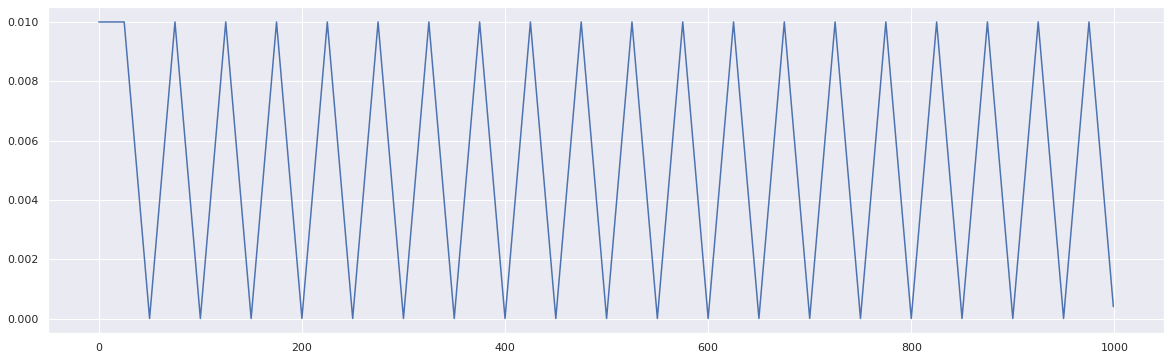

In [232]:

ep_num = 1000

# step_size = 25 # currently best for foot pp
# max_lr = 0.01 # currently best for foot pp
# base_lr = 0.000001# 1e-6 1e-7


step_size = 25 # currently best for foot pp
max_lr = 1e-2 # currently best for foot pp
base_lr = 1e-6# 1e-6 1e-7


def clr2(epoch):
    iterations = epoch
    cycle = np.floor(1+iterations/(2*step_size))
    x = np.abs(iterations/step_size - 2*cycle + 1)
    lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
    
    #todo: boost the lr at initial setps.
#     initial_lr = lambda epoch: lr if epoch > step_size*2 else max_lr*100
    initial_lr = lambda epoch: lr if epoch > step_size else max_lr
    lr = initial_lr(epoch)
    #todo: boost the lr at fist step_size.
    
    decay = ((epoch+1)/ep_num)
    base_part = 1.001 #1.1
#     print(decay)
    return lr#* (base_part-decay)


rng = [i for i in range(ep_num)]
y = [clr2(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

In [233]:
print('{} ~ {}'.format(min(y), max(y)))

1e-06 ~ 0.01


In [234]:
for e, lr in zip(rng,y):
    print('{}\t {}\n'.format(e, lr))

0	 0.01

1	 0.01

2	 0.01

3	 0.01

4	 0.01

5	 0.01

6	 0.01

7	 0.01

8	 0.01

9	 0.01

10	 0.01

11	 0.01

12	 0.01

13	 0.01

14	 0.01

15	 0.01

16	 0.01

17	 0.01

18	 0.01

19	 0.01

20	 0.01

21	 0.01

22	 0.01

23	 0.01

24	 0.01

25	 0.01

26	 0.00960004

27	 0.00920008

28	 0.00880012

29	 0.00840016

30	 0.0080002

31	 0.007600240000000001

32	 0.007200280000000001

33	 0.00680032

34	 0.00640036

35	 0.006000400000000001

36	 0.005600440000000001

37	 0.00520048

38	 0.004800520000000001

39	 0.00440056

40	 0.0040006

41	 0.0036006400000000013

42	 0.003200680000000001

43	 0.0028007200000000005

44	 0.0024007600000000005

45	 0.0020008

46	 0.0016008399999999992

47	 0.0012008800000000012

48	 0.0008009200000000009

49	 0.00040096000000000044

50	 1e-06

51	 0.00040096000000000044

52	 0.0008009200000000009

53	 0.0012008800000000012

54	 0.0016008400000000016

55	 0.0020008000000000022

56	 0.0024007600000000026

57	 0.0028007199999999983

58	 0.0032006799999999987

59	

In [235]:
# lr_reduceonplateau = tf.keras.callbacks.ReduceLROnPlateau(monitor=monitor, factor=0.1, patience=5, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=1e-12)

In [236]:
# Callback for printing the LR at the end of each epoch.
class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
#         print('\nLearning rate for epoch {} is {}'.format(epoch + 1,
#                                               model_heel.optimizer.lr.numpy()))
        print('\n[{}] Learning rate for epoch {} is {}'.format(
        datetime.now().strftime("%Y%m%d-%H%M-%S"), 
        epoch + 1,
        model_ONE.optimizer._decayed_lr(tf.float32).numpy()))

### Output dir and models

In [237]:
def mk_log_dir(log_dir_name):
    try:
        os.makedirs(log_dir_name)
    except OSError as e:
        print("This log dir exist.")
        if e.errno != errno.EEXIST:
            raise ValueError("we got problem.")

In [238]:
monitor = 'val_loss' #'val_loss' 'val_accuracy' if use ed_loss it still the loss here.

log_dir_name = datetime.now().strftime("%Y%m%d-%H%M%S") 

# mk_log_dir(datetime.now().strftime("%Y%m%d-%H%M%S") )  

In [239]:
# use once at the time
mk_log_dir(log_dir_name)

# ONE MODEL

In [240]:
model_name = 'EfficientNetB0'

In [241]:
#get_best_model_name

# best_model_name = './' + model_name + '_bs-' + str(BATCH_SIZE) + '_s-' + str(img_height) + '_' + "ep-{epoch:02d}-vloss-{val_loss:.2f}" +'_best-weight.h5'
# best_model_name = '{model_name}-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
#best_model_name = './' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_' + monitor + '_best.h5'
# best_model_name = './Leaf_' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_' + datetime.now().strftime("%Y%m%d-%H%M%S") + '_best_' + monitor + '.h5'

# best_model_name = './cop' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_' + datetime.now().strftime("%Y%m%d-%H%M%S") + '_best_' + monitor + '.h5'

def get_best_model_name(th):
    return './' + log_dir_name + '/' + th + '_' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_best_' + monitor + '.h5'

th = 'ONEMODEL'
#th = 'toe'
# th = 'heel'

print(get_best_model_name(th))

best_model_name = get_best_model_name(th)


best_model_save = tf.keras.callbacks.ModelCheckpoint(filepath=best_model_name, 
                             save_best_only = True, 
                             save_weights_only = False,
                             monitor = monitor, 
                             mode = 'auto', verbose = 1)
print('best_model_name:', best_model_name)

./20210126-201106/ONEMODEL_EfficientNetB0_bs8_w120_best_val_loss.h5
best_model_name: ./20210126-201106/ONEMODEL_EfficientNetB0_bs8_w120_best_val_loss.h5


In [242]:
callbacks = [
    best_model_save,
    tf.keras.callbacks.EarlyStopping(monitor=monitor, patience=ep_num), #patience=step_size or ep_num
#     lr_reduceonplateau,
    tf.keras.callbacks.LearningRateScheduler(clr2),#lrdump, decay or lrfn or lrfn2. clr
    PrintLR()
]

In [243]:
# create keras model

# model_name = 'EfficientNetB0'

dropout_rate = 0.2 #less dp rate, say 0.1, train_loss will lower than val_loss

IMG_SHAPE = (img_height, img_width , 3)
print(f'IMG_SHAPE: {IMG_SHAPE}')

with strategy.scope():
    
    base_model = tf.keras.applications.EfficientNetB0(include_top=False, 
                                                      weights='imagenet',
                                                      drop_connect_rate=0.2,
                                                      input_shape=IMG_SHAPE) #{'imagenet', None}

    # Freeze the pretrained weights
    base_model.trainable = False
    print("base_model.trainable : ", base_model.trainable)

    # Rebuild top
    gap2d = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    BNL = tf.keras.layers.BatchNormalization()(gap2d) #tood: remove#
    dropout = tf.keras.layers.Dropout(dropout_rate)(BNL)#tood: remove# J add dropout, for flood 0.2 is ok. for leaf 0.4 is better.
    outputs = tf.keras.layers.Dense(4)(dropout)# remove activation for regression output (to default, the linear)

#     # Rebuild top FOR ONE MODEL (reduce the overfit)
#     gap2d = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
# #     BNL = tf.keras.layers.BatchNormalization()(gap2d) #tood: remove#
# #     dropout = tf.keras.layers.Dropout(dropout_rate)(BNL)#tood: remove# J add dropout, for flood 0.2 is ok. for leaf 0.4 is better.
#     outputs = tf.keras.layers.Dense(4)(gap2d)# remove activation for regression output (to default, the linear)

    
    # Compile new model
    model_ONE = tf.keras.Model(base_model.input, outputs, name=model_name)


    # unfreeze the top #fine_tune_at# layers while leaving BatchNorm layers frozen
    fine_tune_at = 20
    print('[Note] Now create model fine tuneing at Top-{} layers!'.format(fine_tune_at))
    for layer in model_ONE.layers[-fine_tune_at:]:
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = True

    model_ONE.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),#RMSprop , Adam, SGD Adadelta(learning_rate=0.001), if set lr_callback the learning_rate=0.001 will not effeced.
                    loss=ed_metric_2d_mean_ONE_4)# 'mae', ONE MODEL -> ed_metric_2d_mean_ONE #,#, ed_loss ed_metric_2d ed_metric_2d_mean            
                    #metrics=['mae', 'accuracy'])



# # AdaBeliefOptimizer(learning_rate=1e-3, epsilon=1e-14, rectify=False)
# model_toe.compile(optimizer = AdaBeliefOptimizer(learning_rate=1e-3, epsilon=1e-14, rectify=False),#RMSprop , Adam, SGD Adadelta(learning_rate=0.001), if set lr_callback the learning_rate=0.001 will not effeced.
#                 loss=ed_metric_2d_mean)#,#, ed_loss ed_metric_2d ed_metric_2d_mean            
#                 #metrics=['mae', 'accuracy'])

IMG_SHAPE: (400, 120, 3)
base_model.trainable :  False
[Note] Now create model fine tuneing at Top-20 layers!


In [244]:
%%time

# fit the model on all data
history_ONE = model_ONE.fit(train_ds_pre_s, 
                      verbose=1, 
                      epochs=ep_num, 
                      validation_data=valid_ds_pre_s, 
                      callbacks=callbacks)#, validation_split=0.1)

Epoch 1/1000
INFO:tensorflow:batch_all_reduce: 12 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 12 all-reduces with algorithm = nccl, num_packs = 1
15/15 [==============================] - ETA: 0s - loss: nan     
Epoch 00001: val_loss did not improve from inf

[20210126-2012-25] Learning rate for epoch 1 is 0.009999999776482582
15/15 [==============================] - 32s 2s/step - loss: nan - val_loss: nan
Epoch 2/1000
13/15 [=========================>....] - ETA: 0s - loss: 707.9324
Epoch 00002: val_loss did not improve from inf

[20210126-2012-27] Learning rate for epoch 2 is 0.009999999776482582
15/15 [==============================] - 1s 61ms/step - loss: nan - val_loss: nan
Epoch 3/1000
15/15 [==============================] - ETA: 0s - loss: nan     
Epoch 00003: val_loss did not improve from inf

[20210126-2012-44] Learning rate for epoch 3 is 0.009999999776482582
15/15 [==============================] - 17s 1s/step - loss: nan - val_loss: 

Epoch 30/1000
13/15 [=========================>....] - ETA: 0s - loss: 34.8578
Epoch 00030: val_loss did not improve from inf

[20210126-2013-21] Learning rate for epoch 30 is 0.008400159887969494
15/15 [==============================] - 1s 62ms/step - loss: nan - val_loss: nan
Epoch 31/1000
13/15 [=========================>....] - ETA: 0s - loss: 31.9581
Epoch 00031: val_loss did not improve from inf

[20210126-2013-22] Learning rate for epoch 31 is 0.008000199683010578
15/15 [==============================] - 1s 63ms/step - loss: nan - val_loss: nan
Epoch 32/1000
13/15 [=========================>....] - ETA: 0s - loss: 33.5713
Epoch 00032: val_loss did not improve from inf

[20210126-2013-23] Learning rate for epoch 32 is 0.00760023994371295
15/15 [==============================] - 1s 61ms/step - loss: nan - val_loss: nan
Epoch 33/1000
13/15 [=========================>....] - ETA: 0s - loss: 33.4361
Epoch 00033: val_loss did not improve from inf

[20210126-2013-24] Learning rate for 

Epoch 60/1000
13/15 [=========================>....] - ETA: 0s - loss: 30.1872
Epoch 00060: val_loss did not improve from inf

[20210126-2013-57] Learning rate for epoch 60 is 0.0036006399895995855
15/15 [==============================] - 1s 59ms/step - loss: nan - val_loss: nan
Epoch 61/1000
15/15 [==============================] - ETA: 0s - loss: nan    
Epoch 00061: val_loss did not improve from inf

[20210126-2013-58] Learning rate for epoch 61 is 0.004000599961727858
15/15 [==============================] - 1s 61ms/step - loss: nan - val_loss: nan
Epoch 62/1000
13/15 [=========================>....] - ETA: 0s - loss: 29.7751
Epoch 00062: val_loss did not improve from inf

[20210126-2014-00] Learning rate for epoch 62 is 0.004400560166686773
15/15 [==============================] - 1s 59ms/step - loss: nan - val_loss: nan
Epoch 63/1000
13/15 [=========================>....] - ETA: 0s - loss: 33.1317
Epoch 00063: val_loss did not improve from inf

[20210126-2014-01] Learning rate fo

Epoch 90/1000
13/15 [=========================>....] - ETA: 0s - loss: 28.9740
Epoch 00090: val_loss did not improve from inf

[20210126-2014-36] Learning rate for epoch 90 is 0.004400560166686773
15/15 [==============================] - 1s 60ms/step - loss: nan - val_loss: nan
Epoch 91/1000
13/15 [=========================>....] - ETA: 0s - loss: 29.1174
Epoch 00091: val_loss did not improve from inf

[20210126-2014-37] Learning rate for epoch 91 is 0.004000599961727858
15/15 [==============================] - 1s 59ms/step - loss: nan - val_loss: nan
Epoch 92/1000
13/15 [=========================>....] - ETA: 0s - loss: 27.8041
Epoch 00092: val_loss did not improve from inf

[20210126-2014-39] Learning rate for epoch 92 is 0.0036006399895995855
15/15 [==============================] - 1s 62ms/step - loss: nan - val_loss: nan
Epoch 93/1000
13/15 [=========================>....] - ETA: 0s - loss: 27.6487
Epoch 00093: val_loss did not improve from inf

[20210126-2014-40] Learning rate fo

13/15 [=========================>....] - ETA: 0s - loss: 25.2306
Epoch 00148: val_loss did not improve from inf

[20210126-2015-50] Learning rate for epoch 148 is 0.0012008800404146314
15/15 [==============================] - 1s 63ms/step - loss: nan - val_loss: nan
Epoch 149/1000
13/15 [=========================>....] - ETA: 0s - loss: 28.1004
Epoch 00149: val_loss did not improve from inf

[20210126-2015-51] Learning rate for epoch 149 is 0.0008009200100786984
15/15 [==============================] - 1s 60ms/step - loss: nan - val_loss: nan
Epoch 150/1000
15/15 [==============================] - ETA: 0s - loss: nan    
Epoch 00150: val_loss did not improve from inf

[20210126-2015-52] Learning rate for epoch 150 is 0.0004009600088465959
15/15 [==============================] - 1s 61ms/step - loss: nan - val_loss: nan
Epoch 151/1000
13/15 [=========================>....] - ETA: 0s - loss: 26.7213
Epoch 00151: val_loss did not improve from inf

[20210126-2015-53] Learning rate for epoc

13/15 [=========================>....] - ETA: 0s - loss: 25.5347
Epoch 00206: val_loss did not improve from inf

[20210126-2017-05] Learning rate for epoch 206 is 0.0020008001010864973
15/15 [==============================] - 1s 59ms/step - loss: nan - val_loss: nan
Epoch 207/1000
13/15 [=========================>....] - ETA: 0s - loss: 25.3799
Epoch 00207: val_loss did not improve from inf

[20210126-2017-06] Learning rate for epoch 207 is 0.0024007600732147694
15/15 [==============================] - 1s 58ms/step - loss: nan - val_loss: nan
Epoch 208/1000
13/15 [=========================>....] - ETA: 0s - loss: 26.7419
Epoch 00208: val_loss did not improve from inf

[20210126-2017-08] Learning rate for epoch 208 is 0.0028007200453430414
15/15 [==============================] - 1s 59ms/step - loss: nan - val_loss: nan
Epoch 209/1000
13/15 [=========================>....] - ETA: 0s - loss: 26.9978
Epoch 00209: val_loss did not improve from inf

[20210126-2017-09] Learning rate for epoc

13/15 [=========================>....] - ETA: 0s - loss: 27.1988
Epoch 00264: val_loss did not improve from inf

[20210126-2018-18] Learning rate for epoch 264 is 0.005200480110943317
15/15 [==============================] - 1s 61ms/step - loss: nan - val_loss: nan
Epoch 265/1000
15/15 [==============================] - ETA: 0s - loss: nan    
Epoch 00265: val_loss did not improve from inf

[20210126-2018-20] Learning rate for epoch 265 is 0.005600439850240946
15/15 [==============================] - 1s 61ms/step - loss: nan - val_loss: nan
Epoch 266/1000
13/15 [=========================>....] - ETA: 0s - loss: 27.9813
Epoch 00266: val_loss did not improve from inf

[20210126-2018-21] Learning rate for epoch 266 is 0.0060004000551998615
15/15 [==============================] - 1s 60ms/step - loss: nan - val_loss: nan
Epoch 267/1000
13/15 [=========================>....] - ETA: 0s - loss: 27.3579
Epoch 00267: val_loss did not improve from inf

[20210126-2018-22] Learning rate for epoch 

13/15 [=========================>....] - ETA: 0s - loss: 27.1225
Epoch 00322: val_loss did not improve from inf

[20210126-2019-33] Learning rate for epoch 322 is 0.008400159887969494
15/15 [==============================] - 3s 223ms/step - loss: nan - val_loss: nan
Epoch 323/1000
13/15 [=========================>....] - ETA: 0s - loss: 27.7771
Epoch 00323: val_loss did not improve from inf

[20210126-2019-35] Learning rate for epoch 323 is 0.00880012009292841
15/15 [==============================] - 1s 63ms/step - loss: nan - val_loss: nan
Epoch 324/1000
13/15 [=========================>....] - ETA: 0s - loss: 25.9490
Epoch 00324: val_loss did not improve from inf

[20210126-2019-36] Learning rate for epoch 324 is 0.009200080297887325
15/15 [==============================] - 1s 61ms/step - loss: nan - val_loss: nan
Epoch 325/1000
13/15 [=========================>....] - ETA: 0s - loss: 27.1386
Epoch 00325: val_loss did not improve from inf

[20210126-2019-37] Learning rate for epoch 3

13/15 [=========================>....] - ETA: 0s - loss: 27.2506
Epoch 00380: val_loss did not improve from inf

[20210126-2020-47] Learning rate for epoch 380 is 0.008400159887969494
15/15 [==============================] - 1s 60ms/step - loss: nan - val_loss: nan
Epoch 381/1000
13/15 [=========================>....] - ETA: 0s - loss: 26.3913
Epoch 00381: val_loss did not improve from inf

[20210126-2020-48] Learning rate for epoch 381 is 0.008000199683010578
15/15 [==============================] - 1s 60ms/step - loss: nan - val_loss: nan
Epoch 382/1000
13/15 [=========================>....] - ETA: 0s - loss: 25.1791
Epoch 00382: val_loss did not improve from inf

[20210126-2020-49] Learning rate for epoch 382 is 0.00760023994371295
15/15 [==============================] - 1s 59ms/step - loss: nan - val_loss: nan
Epoch 383/1000
13/15 [=========================>....] - ETA: 0s - loss: 26.8253
Epoch 00383: val_loss did not improve from inf

[20210126-2020-50] Learning rate for epoch 38

13/15 [=========================>....] - ETA: 0s - loss: 24.9328
Epoch 00438: val_loss did not improve from inf

[20210126-2022-00] Learning rate for epoch 438 is 0.005200480110943317
15/15 [==============================] - 1s 60ms/step - loss: nan - val_loss: nan
Epoch 439/1000
13/15 [=========================>....] - ETA: 0s - loss: 25.2649
Epoch 00439: val_loss did not improve from inf

[20210126-2022-01] Learning rate for epoch 439 is 0.004800519905984402
15/15 [==============================] - 1s 64ms/step - loss: nan - val_loss: nan
Epoch 440/1000
13/15 [=========================>....] - ETA: 0s - loss: 26.5404
Epoch 00440: val_loss did not improve from inf

[20210126-2022-02] Learning rate for epoch 440 is 0.004400560166686773
15/15 [==============================] - 1s 62ms/step - loss: nan - val_loss: nan
Epoch 441/1000
13/15 [=========================>....] - ETA: 0s - loss: 24.3134
Epoch 00441: val_loss did not improve from inf

[20210126-2022-04] Learning rate for epoch 4

13/15 [=========================>....] - ETA: 0s - loss: 22.9987
Epoch 00496: val_loss did not improve from inf

[20210126-2023-15] Learning rate for epoch 496 is 0.0020008001010864973
15/15 [==============================] - 1s 61ms/step - loss: nan - val_loss: nan
Epoch 497/1000
13/15 [=========================>....] - ETA: 0s - loss: 24.3312
Epoch 00497: val_loss did not improve from inf

[20210126-2023-16] Learning rate for epoch 497 is 0.0016008400125429034
15/15 [==============================] - 1s 62ms/step - loss: nan - val_loss: nan
Epoch 498/1000
13/15 [=========================>....] - ETA: 0s - loss: 24.2384
Epoch 00498: val_loss did not improve from inf

[20210126-2023-18] Learning rate for epoch 498 is 0.0012008800404146314
15/15 [==============================] - 1s 60ms/step - loss: nan - val_loss: nan
Epoch 499/1000
13/15 [=========================>....] - ETA: 0s - loss: 24.4992
Epoch 00499: val_loss did not improve from inf

[20210126-2023-19] Learning rate for epoc

13/15 [=========================>....] - ETA: 0s - loss: 24.1171
Epoch 00554: val_loss did not improve from inf

[20210126-2024-28] Learning rate for epoch 554 is 0.0012008800404146314
15/15 [==============================] - 1s 59ms/step - loss: nan - val_loss: nan
Epoch 555/1000
13/15 [=========================>....] - ETA: 0s - loss: 23.9416
Epoch 00555: val_loss did not improve from inf

[20210126-2024-29] Learning rate for epoch 555 is 0.0016008400125429034
15/15 [==============================] - 1s 61ms/step - loss: nan - val_loss: nan
Epoch 556/1000
13/15 [=========================>....] - ETA: 0s - loss: 23.5287
Epoch 00556: val_loss did not improve from inf

[20210126-2024-31] Learning rate for epoch 556 is 0.0020008001010864973
15/15 [==============================] - 1s 59ms/step - loss: nan - val_loss: nan
Epoch 557/1000
13/15 [=========================>....] - ETA: 0s - loss: 24.6262
Epoch 00557: val_loss did not improve from inf

[20210126-2024-32] Learning rate for epoc

13/15 [=========================>....] - ETA: 0s - loss: 25.2176
Epoch 00612: val_loss did not improve from inf

[20210126-2025-41] Learning rate for epoch 612 is 0.004400560166686773
15/15 [==============================] - 1s 61ms/step - loss: nan - val_loss: nan
Epoch 613/1000
13/15 [=========================>....] - ETA: 0s - loss: 25.2335
Epoch 00613: val_loss did not improve from inf

[20210126-2025-42] Learning rate for epoch 613 is 0.004800519905984402
15/15 [==============================] - 1s 60ms/step - loss: nan - val_loss: nan
Epoch 614/1000
13/15 [=========================>....] - ETA: 0s - loss: 25.1739
Epoch 00614: val_loss did not improve from inf

[20210126-2025-43] Learning rate for epoch 614 is 0.005200480110943317
15/15 [==============================] - 1s 60ms/step - loss: nan - val_loss: nan
Epoch 615/1000
13/15 [=========================>....] - ETA: 0s - loss: 25.8561
Epoch 00615: val_loss did not improve from inf

[20210126-2025-45] Learning rate for epoch 6

15/15 [==============================] - ETA: 0s - loss: nan    
Epoch 00670: val_loss did not improve from inf

[20210126-2026-56] Learning rate for epoch 670 is 0.00760023994371295
15/15 [==============================] - 1s 62ms/step - loss: nan - val_loss: nan
Epoch 671/1000
13/15 [=========================>....] - ETA: 0s - loss: 26.6431
Epoch 00671: val_loss did not improve from inf

[20210126-2026-58] Learning rate for epoch 671 is 0.008000199683010578
15/15 [==============================] - 1s 63ms/step - loss: nan - val_loss: nan
Epoch 672/1000
15/15 [==============================] - ETA: 0s - loss: nan    
Epoch 00672: val_loss did not improve from inf

[20210126-2026-59] Learning rate for epoch 672 is 0.008400159887969494
15/15 [==============================] - 1s 61ms/step - loss: nan - val_loss: nan
Epoch 673/1000
13/15 [=========================>....] - ETA: 0s - loss: 26.0206
Epoch 00673: val_loss did not improve from inf

[20210126-2027-00] Learning rate for epoch 67

13/15 [=========================>....] - ETA: 0s - loss: 26.5286
Epoch 00728: val_loss did not improve from inf

[20210126-2028-10] Learning rate for epoch 728 is 0.009200080297887325
15/15 [==============================] - 1s 62ms/step - loss: nan - val_loss: nan
Epoch 729/1000
15/15 [==============================] - ETA: 0s - loss: nan    
Epoch 00729: val_loss did not improve from inf

[20210126-2028-11] Learning rate for epoch 729 is 0.00880012009292841
15/15 [==============================] - 1s 62ms/step - loss: nan - val_loss: nan
Epoch 730/1000
13/15 [=========================>....] - ETA: 0s - loss: 25.7005
Epoch 00730: val_loss did not improve from inf

[20210126-2028-12] Learning rate for epoch 730 is 0.008400159887969494
15/15 [==============================] - 1s 59ms/step - loss: nan - val_loss: nan
Epoch 731/1000
13/15 [=========================>....] - ETA: 0s - loss: 25.9824
Epoch 00731: val_loss did not improve from inf

[20210126-2028-13] Learning rate for epoch 73

13/15 [=========================>....] - ETA: 0s - loss: 25.4947
Epoch 00786: val_loss did not improve from inf

[20210126-2029-25] Learning rate for epoch 786 is 0.0060004000551998615
15/15 [==============================] - 1s 63ms/step - loss: nan - val_loss: nan
Epoch 787/1000
13/15 [=========================>....] - ETA: 0s - loss: 26.5496
Epoch 00787: val_loss did not improve from inf

[20210126-2029-26] Learning rate for epoch 787 is 0.005600439850240946
15/15 [==============================] - 1s 61ms/step - loss: nan - val_loss: nan
Epoch 788/1000
13/15 [=========================>....] - ETA: 0s - loss: 25.6096
Epoch 00788: val_loss did not improve from inf

[20210126-2029-28] Learning rate for epoch 788 is 0.005200480110943317
15/15 [==============================] - 1s 61ms/step - loss: nan - val_loss: nan
Epoch 789/1000
13/15 [=========================>....] - ETA: 0s - loss: 25.4174
Epoch 00789: val_loss did not improve from inf

[20210126-2029-29] Learning rate for epoch 

13/15 [=========================>....] - ETA: 0s - loss: 23.8075
Epoch 00844: val_loss did not improve from inf

[20210126-2030-38] Learning rate for epoch 844 is 0.0028007200453430414
15/15 [==============================] - 1s 60ms/step - loss: nan - val_loss: nan
Epoch 845/1000
13/15 [=========================>....] - ETA: 0s - loss: 24.1270
Epoch 00845: val_loss did not improve from inf

[20210126-2030-39] Learning rate for epoch 845 is 0.0024007600732147694
15/15 [==============================] - 1s 59ms/step - loss: nan - val_loss: nan
Epoch 846/1000
13/15 [=========================>....] - ETA: 0s - loss: 24.1141
Epoch 00846: val_loss did not improve from inf

[20210126-2030-40] Learning rate for epoch 846 is 0.0020008001010864973
15/15 [==============================] - 1s 59ms/step - loss: nan - val_loss: nan
Epoch 847/1000
13/15 [=========================>....] - ETA: 0s - loss: 25.4319
Epoch 00847: val_loss did not improve from inf

[20210126-2030-42] Learning rate for epoc

13/15 [=========================>....] - ETA: 0s - loss: 24.1083
Epoch 00902: val_loss did not improve from inf

[20210126-2031-51] Learning rate for epoch 902 is 0.0004009600088465959
15/15 [==============================] - 1s 58ms/step - loss: nan - val_loss: nan
Epoch 903/1000
13/15 [=========================>....] - ETA: 0s - loss: 23.7528
Epoch 00903: val_loss did not improve from inf

[20210126-2031-52] Learning rate for epoch 903 is 0.0008009200100786984
15/15 [==============================] - 1s 60ms/step - loss: nan - val_loss: nan
Epoch 904/1000
13/15 [=========================>....] - ETA: 0s - loss: 23.3624
Epoch 00904: val_loss did not improve from inf

[20210126-2031-53] Learning rate for epoch 904 is 0.0012008800404146314
15/15 [==============================] - 1s 62ms/step - loss: nan - val_loss: nan
Epoch 905/1000
13/15 [=========================>....] - ETA: 0s - loss: 24.3880
Epoch 00905: val_loss did not improve from inf

[20210126-2031-54] Learning rate for epoc

13/15 [=========================>....] - ETA: 0s - loss: 24.7145
Epoch 00960: val_loss did not improve from inf

[20210126-2033-06] Learning rate for epoch 960 is 0.0036006399895995855
15/15 [==============================] - 1s 61ms/step - loss: nan - val_loss: nan
Epoch 961/1000
13/15 [=========================>....] - ETA: 0s - loss: 24.7575
Epoch 00961: val_loss did not improve from inf

[20210126-2033-07] Learning rate for epoch 961 is 0.004000599961727858
15/15 [==============================] - 1s 64ms/step - loss: nan - val_loss: nan
Epoch 962/1000
13/15 [=========================>....] - ETA: 0s - loss: 24.6242
Epoch 00962: val_loss did not improve from inf

[20210126-2033-08] Learning rate for epoch 962 is 0.004400560166686773
15/15 [==============================] - 1s 60ms/step - loss: nan - val_loss: nan
Epoch 963/1000
13/15 [=========================>....] - ETA: 0s - loss: 24.2962
Epoch 00963: val_loss did not improve from inf

[20210126-2033-09] Learning rate for epoch 

In [ ]:
model_ONE.summary()

In [ ]:
# tf.keras.utils.plot_model(model_toe, show_shapes=True)

In [ ]:
# show after modl.fit
model_ONE.metrics_names

In [ ]:
# check metrics the model have.
history_ONE.history.keys()

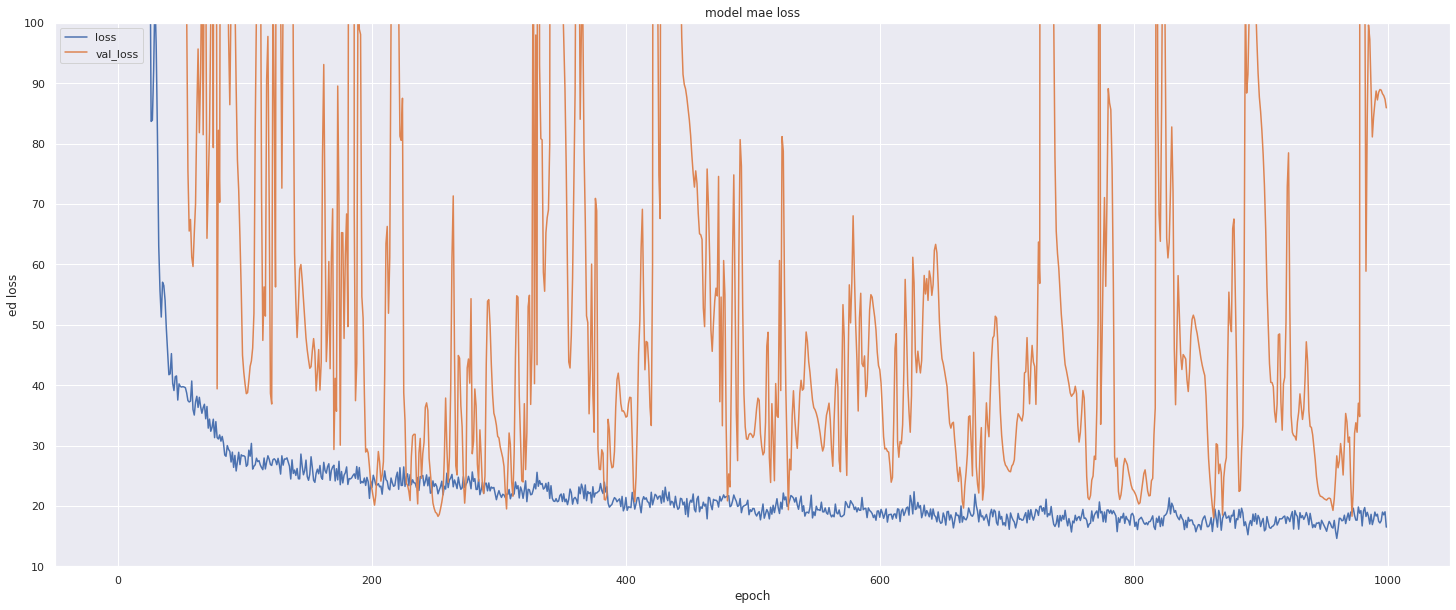

In [122]:
# check the loos the model trained.
plt.figure(figsize=(25, 10))
plt.plot(history_ONE.history['loss'])
plt.plot(history_ONE.history['val_loss'])
plt.title('model mae loss')
plt.ylabel('ed loss'), plt.ylim(10, 100)# for too large loss
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left') 
plt.show()


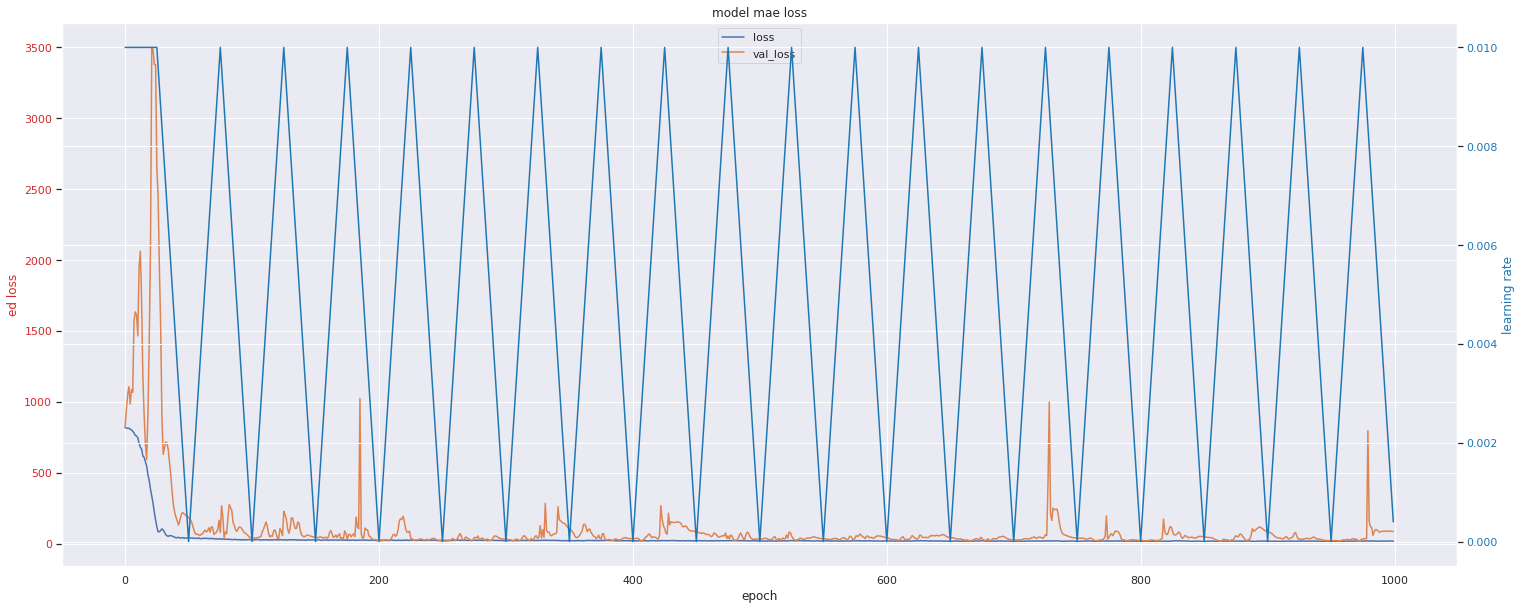

In [123]:
# check the loos the model trained.

# for different scales (different Y-axes)
# fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(25, 10))

# nice to have this colorful tip.
color = 'tab:red'

ax1.set_title('model mae loss')

ax1.set_xlabel('epoch')
ax1.set_ylabel('ed loss', color=color)

ax1.plot(history_ONE.history['loss'])
ax1.plot(history_ONE.history['val_loss'])
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['loss', 'val_loss'], loc='upper center') # legend may ocvered by next ax ploting. moved to end.


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('learning rate', color=color)
ax2.plot(history_ONE.history['lr'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()


## Check the mean-Euclidean Distance of test data

may modify the ed-loss function

In [ ]:
# mean ed-loss == mean ed of test data.
model_ONE.evaluate(valid_ds_pre_s)

In [ ]:
%%time
# inference all test_ds once
predictions_ONE = model_ONE.predict(valid_ds_pre_s)
predictions_ONE.shape

In [ ]:
#np.ndarray
predictions_ONE

### Pre check ED by validation ds

In [ ]:
len(valid_ds_pre_s)

In [ ]:
# # create ONE_DS once
# it_valid_ds_pre_s = iter(valid_ds_pre_s)

In [ ]:
%%time

# # create ONE_DS once
it_valid_ds_pre_s = iter(valid_ds_pre_s)

nplabel = [] #np.array([])
i = 0
for BS in range(len(valid_ds_pre_s)):
    image_batch, label_batch = next(it_valid_ds_pre_s)
#     print(label_batch.numpy()
    nplabel.extend(label_batch.numpy()) 
    print(f'[{i}]')
    i += 1


In [ ]:
len(nplabel)

In [ ]:
nplabel

In [ ]:
nplabel = np.stack( nplabel, axis=0 )

In [ ]:
nplabel

In [ ]:
len(nplabel)

## ONE ED

In [ ]:
one_ed = ed_metric_2d_mean_ONE_4(nplabel,predictions_ONE)

In [ ]:
one_ed

#### if reload the best model

In [ ]:
predictions_ONE = best_model_ONE.predict(valid_ds_pre_s)

In [ ]:
ed_metric_2d_mean_ONE_4(nplabel,predictions_ONE)

# ONE MODEL: Merg Toe/Heel model and predict the Test data at once

### Create TEST DS

In [ ]:
ts = 'test_submission.csv'
df_ts = pd.read_csv(ts)
df_ts.head(5)

In [ ]:
df_ts['images']

In [ ]:
# from dataframe
list_ds_test = tf.data.Dataset.from_tensor_slices(df_ts['images'])


In [ ]:
len(list_ds_test)#.shape() #take(1)

In [ ]:
# check The type specification of an element of this dataset.
list_ds_test.element_spec

In [ ]:
for f in list_ds_test.take(5):
    print(f'take test sample: {f}')

### [ONE] TEST DS: Process TEST path to image tensor

In [ ]:
## TEST-DS: re-used from train/val-ds

im_test = 'test_images/'



#
# map list to TEST ds, [ONE MODEL].
#

def decode_crop_png_test(img):
    
    # convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_png(img, channels=3)
    # crop the toe from top-left corner [image, offset_height y1, offset_width x1, target_height, target_width]
#     y1=y_offset_toe;    x1=0;    h=img_height;    w=img_width # not the pp location
#     img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), h, w)
    #img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), int(y2)-int(y1), int(x2)-int(x1))
    # resize the image to the desired size
    return img

def process_path_test(file_name):
    file_path = im_test + file_name
    #label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)#can read the byte string paths b'image_0001.png'
    img = decode_crop_png_test(img)
    return img, file_name


In [ ]:
# TEST ONE ds
test_ds_map_ONE = list_ds_test.map(process_path_test, num_parallel_calls=AUTOTUNE)


In [ ]:
for img, file_name in test_ds_map_ONE.take(5):
    print(f'take sample: {img.shape} {file_name}')
    
print('f', img.dtype)
print('xy', file_name.dtype)

### [ONE] prepare TEST_ds_pre

In [ ]:
def configure_for_performance_cache_test(ds, cache=True):

    if cache:
        ds = ds.cache()
        print("Check cache in memory:Y", cache)
    else:
        print("Check cache in memory:N", cache)
        
#     if augment:
# #         ds = ds.map(data_augment, num_parallel_calls=AUTOTUNE)
#         ds = ds.map(AA, num_parallel_calls=AUTOTUNE)
# #         ds = ds.map(RA, num_parallel_calls=AUTOTUNE)
#         print("Check augment :Y", augment)
#     else:
#         print("Check augment :N", augment)
    
#     #ds = ds.repeat()#TODO:2020-12-14: test
#     ds = ds.shuffle(buffer_size=MULTI_BATCH_SIZE*2) # (buffer_size=MULTI_BATCH_SIZE*5) 6sec,buffer_size=1000 take few sec. or buffer_size=image_count <- take too long # each take ds take 30~45 sec, TODO!!
#     ds = ds.shuffle(len(list_ds), reshuffle_each_iteration=False) #todo: move to ds_pre. see https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
    ds = ds.batch(1000)# 1k for foot test images #MULTI_BATCH_SIZE for multi-GPUs
    ds = ds.prefetch(buffer_size=AUTOTUNE) #buffer_size=AUTOTUNE seem no speed improve
    
    return ds


In [ ]:
"""
Prepare the ds properties (cache, augment, bs, shuffle, prefetch, etc.) for better performance.
"""
# TEST ONE ds_pre
test_ds_pre_ONE = configure_for_performance_cache_test(test_ds_map_ONE)


# [ONE] Load Best-model

In [ ]:
# # if models are in last time frame
best_model_ONE_name = get_best_model_name('ONEMODEL')


# if toe/heel are in different time frame
# best_model_ONE_name = './20210123-185047/ONEMODEL_EfficientNetB0_bs64_w120_best_val_loss.h5'#MAE:3.76918@846


print(best_model_ONE_name)


best_model_ONE = tf.keras.models.load_model(best_model_ONE_name,compile=False)


### compile the model separately afterwards. to load model with custom loss function

* https://github.com/tensorflow/tensorflow/issues/32348

In [ ]:
best_model_ONE.compile(optimizer = tf.keras.optimizers.Adam(),#RMSprop , Adam
                loss=ed_metric_2d_mean)#, ed_loss ed_metric_2d ed_metric_2d_mean            
                #metrics=['mae', 'accuracy'])



In [ ]:
%%time
# inference all test_ds once
predictions_ONE = best_model_ONE.predict(test_ds_pre_ONE)
predictions_ONE.shape

### Merge toe/hell pred

In [ ]:
images_name = np.expand_dims(df_ts['images'], axis=1)

In [ ]:
predictions_merge = np.append(images_name, predictions_ONE, axis=1)#左右接
predictions_merge.shape

In [ ]:
df_submission = pd.DataFrame(predictions_merge)
df_submission.columns = ['images','x1','y1','x2','y2']

In [ ]:
submi_name = 'submission_BEST_ed4_' + log_dir_name +'.csv'
df_submission.to_csv(submi_name, index=False)
print('Save {} as submission CSV.'.format(submi_name))

# EFNE Training (停用)

maybe mae better than ed loss?

In [ ]:
"""lr from kaggle leaf"""
ep_num = 50

lr_start   = 0.000005
lr_max     = 0.00000125 * strategy.num_replicas_in_sync * BATCH_SIZE
lr_min     = 0.000001
lr_ramp_ep = 5
lr_sus_ep  = 0
lr_decay   = 0.8

def lrfn2(epoch):
    if epoch < lr_ramp_ep:
        lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start

    elif epoch < lr_ramp_ep + lr_sus_ep:
        lr = lr_max

    else:
        lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min

    return lr



rng = [i for i in range(ep_num)]
y = [lrfn2(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

In [ ]:
"""dump lr
"""
ep_num = 100000

step_size = 100
lr_max = 0.006
lr_min = 0.001
lr_start = 0.01

lr_init_ep = 0
lr_ramp_ep = 500
lr_sus_ep  = 0
lr_decay   = 0.8

def lrdump(epoch):
    if lr_init_ep -1 < epoch < lr_ramp_ep:
        lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start

    elif epoch < lr_ramp_ep + lr_sus_ep:
        lr = lr_max

    else:
        lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min

    return lr

rng = [i for i in range(ep_num)]
y = [lrdump(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

In [ ]:

""" simple Cyclical Learning Rate (CLR)
https://www.tensorflow.org/addons/api_docs/python/tfa/optimizers/CyclicalLearningRate
https://github.com/bckenstler/CLR
"""

ep_num = 1000

step_size = 25 # currently best for foot pp
max_lr = 0.01 # currently best for foot pp
base_lr = 0.000001# currently best for foot pp 1e-6

# step_size = 25
# boost_lr = 1e-1
# max_lr = 0.01 #1e-4 #0.01
# base_lr = 0.000001 #1e-12#0.000001
  
def clr(epoch):
    iterations = epoch
    cycle = np.floor(1+iterations/(2*step_size))
    x = np.abs(iterations/step_size - 2*cycle + 1)
    lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
    
    #todo: boost the lr at initial setps.
    initial_lr = lambda epoch: lr if epoch > step_size else max_lr
#     initial_lr = lambda epoch: lr if epoch > step_size else boost_lr
    lr = initial_lr(epoch)
    #todo: boost the lr at fist step_size.
    
#     decay = ((epoch+1)/ep_num)
#     base_part = 1.01 #1.1
#     print(decay)
#     return lr* (base_part-decay)

    return lr


rng = [i for i in range(ep_num)]
y = [clr(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

In [ ]:

ep_num = 1000

step_size = 25 # currently best for foot pp
max_lr = 0.01 # currently best for foot pp
base_lr = 0.000001# 1e-6 1e-7

def clr2(epoch):
    iterations = epoch
    cycle = np.floor(1+iterations/(2*step_size))
    x = np.abs(iterations/step_size - 2*cycle + 1)
    lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
    
    #todo: boost the lr at initial setps.
    initial_lr = lambda epoch: lr if epoch > step_size else max_lr
#     initial_lr = lambda epoch: lr if epoch > step_size else boost_lr
    lr = initial_lr(epoch)
    #todo: boost the lr at fist step_size.
    
    decay = ((epoch+1)/ep_num)
    base_part = 1.001 #1.1
#     print(decay)
    return lr* (base_part-decay)


rng = [i for i in range(ep_num)]
y = [clr2(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

In [ ]:
print('{} ~ {}'.format(min(y), max(y)))

In [ ]:
for e, lr in zip(rng,y):
    print('{}\t {}\n'.format(e, lr))

In [ ]:
# lr_reduceonplateau = tf.keras.callbacks.ReduceLROnPlateau(monitor=monitor, factor=0.1, patience=5, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=1e-12)

In [ ]:
# Callback for printing the LR at the end of each epoch.
class PrintLRtoe(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
#     def on_epoch_end(self, epoch, logs=None):
#         print('\n[{}] Learning rate for epoch {} is {}'.format(
#             datetime.now().strftime("%Y%m%d-%H%M-%S"), 
#             epoch + 1,
#             self.model.optimizer.lr.numpy()))
        print('\n[{}] Learning rate for epoch {} is {}'.format(
        datetime.now().strftime("%Y%m%d-%H%M-%S"), 
        epoch + 1,
        model_toe.optimizer._decayed_lr(tf.float32).numpy()))

In [ ]:
# Callback for printing the LR at the end of each epoch.
class PrintLRheel(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
#         print('\nLearning rate for epoch {} is {}'.format(epoch + 1,
#                                               model_heel.optimizer.lr.numpy()))
        print('\n[{}] Learning rate for epoch {} is {}'.format(
        datetime.now().strftime("%Y%m%d-%H%M-%S"), 
        epoch + 1,
        model_heel.optimizer._decayed_lr(tf.float32).numpy()))

### Output dir and models

In [ ]:
def mk_log_dir(log_dir_name):
    try:
        os.makedirs(log_dir_name)
    except OSError as e:
        print("This log dir exist.")
        if e.errno != errno.EEXIST:
            raise ValueError("we got problem.")

In [ ]:
monitor = 'val_loss' #'val_loss' 'val_accuracy' if use ed_loss it still the loss here.

log_dir_name = datetime.now().strftime("%Y%m%d-%H%M%S") 

# mk_log_dir(datetime.now().strftime("%Y%m%d-%H%M%S") )  

In [ ]:
# use once at the time
mk_log_dir(log_dir_name)

# Toe

In [ ]:
model_name = 'EfficientNetB0'

In [ ]:
#get_best_model_name

# best_model_name = './' + model_name + '_bs-' + str(BATCH_SIZE) + '_s-' + str(img_height) + '_' + "ep-{epoch:02d}-vloss-{val_loss:.2f}" +'_best-weight.h5'
# best_model_name = '{model_name}-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
#best_model_name = './' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_' + monitor + '_best.h5'
# best_model_name = './Leaf_' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_' + datetime.now().strftime("%Y%m%d-%H%M%S") + '_best_' + monitor + '.h5'

# best_model_name = './cop' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_' + datetime.now().strftime("%Y%m%d-%H%M%S") + '_best_' + monitor + '.h5'

def get_best_model_name(th):
    return './' + log_dir_name + '/' + th + '_' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_best_' + monitor + '.h5'

th = 'toe'
# th = 'heel'

print(get_best_model_name(th))

best_model_name = get_best_model_name(th)


best_model_save = tf.keras.callbacks.ModelCheckpoint(filepath=best_model_name, 
                             save_best_only = True, 
                             save_weights_only = False,
                             monitor = monitor, 
                             mode = 'auto', verbose = 1)
print('best_model_name:', best_model_name)

In [ ]:
callbacks = [
    best_model_save,
    tf.keras.callbacks.EarlyStopping(monitor=monitor, patience=step_size*3), #patience=step_size or ep_num
#     lr_reduceonplateau,
    tf.keras.callbacks.LearningRateScheduler(clr2),#lrdump, decay or lrfn or lrfn2. clr
    PrintLRtoe()
]

In [ ]:
# create keras model

# model_name = 'EfficientNetB0'

dropout_rate = 0.7 #less dp rate, say 0.1, train_loss will lower than val_loss


with strategy.scope():
    
    base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights=None,drop_connect_rate=0.7) #{'imagenet', None}

    # Freeze the pretrained weights
    base_model.trainable = False
    print("base_model.trainable : ", base_model.trainable)

    # Rebuild top
    gap2d = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    BNL = tf.keras.layers.BatchNormalization()(gap2d) #tood: remove#
    dropout = tf.keras.layers.Dropout(dropout_rate)(BNL)#tood: remove# J add dropout, for flood 0.2 is ok. for leaf 0.4 is better.
    outputs = tf.keras.layers.Dense(2)(dropout)# remove activation for regression output (to default, the linear)

    # Compile new model
    model_toe = tf.keras.Model(base_model.input, outputs, name=model_name)


    # unfreeze the top #fine_tune_at# layers while leaving BatchNorm layers frozen
    fine_tune_at = 20
    print('[Note] Now create model fine tuneing at Top-{} layers!'.format(fine_tune_at))
    for layer in model_toe.layers[-fine_tune_at:]:
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = True

    model_toe.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),#RMSprop , Adam, SGD Adadelta(learning_rate=0.001), if set lr_callback the learning_rate=0.001 will not effeced.
                    loss=ed_metric_2d_mean)#,#, ed_loss ed_metric_2d ed_metric_2d_mean            
                    #metrics=['mae', 'accuracy'])



# # AdaBeliefOptimizer(learning_rate=1e-3, epsilon=1e-14, rectify=False)
# model_toe.compile(optimizer = AdaBeliefOptimizer(learning_rate=1e-3, epsilon=1e-14, rectify=False),#RMSprop , Adam, SGD Adadelta(learning_rate=0.001), if set lr_callback the learning_rate=0.001 will not effeced.
#                 loss=ed_metric_2d_mean)#,#, ed_loss ed_metric_2d ed_metric_2d_mean            
#                 #metrics=['mae', 'accuracy'])

In [ ]:
%%time

# fit the model on all data
history_toe = model_toe.fit(train_ds_pre_toe_s, 
                      verbose=1, 
                      epochs=ep_num, 
                      validation_data=valid_ds_pre_toe_s, 
                      callbacks=callbacks)#, validation_split=0.1)

In [ ]:
# model_toe.summary()

In [ ]:
# tf.keras.utils.plot_model(model_toe, show_shapes=True)

In [ ]:
# show after modl.fit
model_toe.metrics_names

In [ ]:
# check metrics the model have.
history_toe.history.keys()

In [ ]:
# check the loos the model trained.
plt.figure(figsize=(25, 10))
plt.plot(history_toe.history['loss'])
plt.plot(history_toe.history['val_loss'])
plt.title('model ed loss')
plt.ylabel('ed loss')#, plt.ylim(5, 10)# for too large loss
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left') 
plt.show()


In [ ]:
# check the loos the model trained.

# for different scales (different Y-axes)
# fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(25, 10))

# nice to have this colorful tip.
color = 'tab:red'

ax1.set_title('model ed loss')

ax1.set_xlabel('epoch')
ax1.set_ylabel('ed loss', color=color)

ax1.plot(history_toe.history['loss'])
ax1.plot(history_toe.history['val_loss'])
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['loss', 'val_loss'], loc='upper center') # legend may ocvered by next ax ploting. moved to end.


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('learning rate', color=color)
ax2.plot(history_toe.history['lr'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()


## Check the mean-Euclidean Distance of test data

may modify the ed-loss function

In [ ]:
# mean ed-loss == mean ed of test data.
model_toe.evaluate(valid_ds_pre_toe_s)

# Heel 

In [ ]:
# HEEL CLR2 special case!!!

ep_num = 1000

step_size = 25 # currently best for foot pp
max_lr = 0.01 #0.01 # currently best for foot pp
base_lr = 1e-6 #0.0000001#  1e-7

def clr2_heel(epoch):
    iterations = epoch
    cycle = np.floor(1+iterations/(2*step_size))
    x = np.abs(iterations/step_size - 2*cycle + 1)
    lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
    
    #todo: boost the lr at initial setps.
    initial_lr = lambda epoch: lr if epoch > step_size else max_lr
#     initial_lr = lambda epoch: lr if epoch > step_size else boost_lr
    lr = initial_lr(epoch)
    #todo: boost the lr at fist step_size.
    
    decay = ((epoch+1)/ep_num)
    base_part = 1.01 #1.1
#     print(decay)
    return lr* (base_part-decay)


rng = [i for i in range(ep_num)]
y = [clr2_heel(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)





# ep_num = 500

# step_size = 20 # currently best for foot pp
# max_lr = 0.01 #0.01 # currently best for foot pp
# base_lr = 1e-4 #0.0000001#  1e-7

# def clr2_heel(epoch):
#     iterations = epoch
#     cycle = np.floor(1+iterations/(2*step_size))
#     x = np.abs(iterations/step_size - 2*cycle + 1)
#     lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
    
#     #todo: boost the lr at initial setps.
#     if epoch < 20:
#         lr = max_lr
# #     if 100 < epoch < 150 :
# #         lr = max_lr * 1.105

    
#     decay = ((epoch+1)/ep_num)
#     base_part = 1.01 #1.1
# #     print(decay)
#     return lr* (base_part-decay)


# rng = [i for i in range(ep_num)]
# y = [clr2_heel(x) for x in rng]
# sns.set(style='darkgrid')
# fig, ax = plt.subplots(figsize=(20, 6))
# plt.plot(rng, y)





In [ ]:
"""

"""
# lr_reduceonplateau = tf.keras.callbacks.ReduceLROnPlateau(monitor=monitor, 
#                                                           factor=0.5, 
#                                                           patience=15, 
#                                                           verbose=1, 
#                                                           mode='auto', 
#                                                           #min_delta=0.0001, 
#                                                           cooldown=5, 
#                                                           #min_lr=1e-12
#                                                          )

In [ ]:
def get_best_model_name(th):
    return './' + log_dir_name + '/' + th + '_' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_best_' + monitor + '.h5'

# th = 'toe'
th = 'heel'

print(get_best_model_name(th))

best_model_name = get_best_model_name(th)


best_model_save = tf.keras.callbacks.ModelCheckpoint(filepath=best_model_name, 
                             save_best_only = True, 
                             save_weights_only = False,
                             monitor = monitor, 
                             mode = 'auto', verbose = 1)
print('best_model_name:', best_model_name)

In [ ]:
logdir = log_dir_name + "/logs/"

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
callbacks = [
#     tensorboard_callback,
    best_model_save,
    tf.keras.callbacks.EarlyStopping(monitor=monitor, patience=step_size*3), #patience=step_size ot ep_num
    tf.keras.callbacks.LearningRateScheduler(clr2_heel),#,clr2_heel  lrfn2_heel decay or lrfn or lrfn2. clr
#     lr_reduceonplateau,
    PrintLRheel()
]

In [ ]:
# create keras model

model_name = 'EfficientNetB0'

dropout_rate = 0.7 #less dp rate, say 0.1, train_loss will lower than val_loss

with strategy.scope():

    base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet',drop_connect_rate=0.7)

    # Freeze the pretrained weights
    base_model.trainable = False

    # Rebuild top
    gap2d = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    BNL = tf.keras.layers.BatchNormalization()(gap2d) #tood: remove#
    dropout = tf.keras.layers.Dropout(dropout_rate)(BNL)#tood: remove# J add dropout, for flood 0.2 is ok. for leaf 0.4 is better.
    outputs = tf.keras.layers.Dense(2)(dropout)# remove activation for regression output (to default, the linear)

    # Compile new model
    model_heel = tf.keras.Model(base_model.input, outputs, name=model_name)


    # unfreeze the top #fine_tune_at# layers while leaving BatchNorm layers frozen
    fine_tune_at = 20
    for layer in model_heel.layers[-fine_tune_at:]:
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
          layer.trainable = True

    model_heel.compile(optimizer = tf.keras.optimizers.Adam(0.01),#RMSprop , Adam
                    loss=ed_metric_2d_mean)#, ed_loss ed_metric_2d ed_metric_2d_mean            
                    #metrics=['mae', 'accuracy'])


In [ ]:
%%time

# fit the model on all data
history_heel = model_heel.fit(train_ds_pre_heel_s, 
                      verbose=1, 
                      epochs=ep_num, 
                      validation_data=valid_ds_pre_heel_s, 
                      callbacks=callbacks)

In [ ]:
# check the loos the model trained.
plt.figure(figsize=(25, 10))
plt.plot(history_heel.history['loss'])
plt.plot(history_heel.history['val_loss'])
plt.title('model ed loss')
plt.ylabel('ed loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left') 
plt.show()

In [ ]:
# check the loos the model trained.


# for different scales (different Y-axes)
# fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(25, 10))

# nice to have this colorful tip.
color = 'tab:red'

ax1.set_title('model ed loss')

ax1.set_xlabel('epoch')
ax1.set_ylabel('ed loss', color=color)

ax1.plot(history_heel.history['loss'])
ax1.plot(history_heel.history['val_loss'])
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['loss', 'val_loss'], loc='upper center') # legend may ocvered by next ax ploting. moved to end.


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('learning rate', color=color)
ax2.plot(history_heel.history['lr'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()


In [ ]:
# mean ed-loss == mean ed of test data.
model_heel.evaluate(valid_ds_pre_heel_s)

## Show predictions

In [ ]:
%%time
# inference all val_ds
predictions = model.predict(valid_ds_pre_toe_s)

In [ ]:
predictions.shape

In [ ]:
predictions[:5]

In [ ]:
%%time

# inference bs by bs of val_ds #model.predict()#一次做完即可不用分batch
image_batch, label_batch = valid_ds_pre_heel_s.as_numpy_iterator().next()
pred = model.predict_on_batch(image_batch)

In [ ]:
image_batch.shape

In [ ]:
pred.shape

In [ ]:
pred[:5]

In [ ]:
label_batch[:5]

In [ ]:
#test_ds一次做完即可不用分batch
neg = label_batch - pred
neg[:5]

In [ ]:
neg[:5]

In [ ]:
neg.mean()#所有x,y平均

In [ ]:
neg.mean(axis=0)#所有x 所有y個別平均

In [ ]:
neg.mean(axis=1)#左x右y相加的平均

In [ ]:
np.median(neg)#中位數

In [ ]:
neg.min(axis=0)

In [ ]:
neg.max(axis=0)

In [ ]:
model.metrics_names

## show pp pred

* we can switch toe/hell by comment it

### Baseline Simple2D model

In [ ]:
it_valid_ds_pre_toe_s = iter(valid_ds_pre_toe_s)
# it_valid_ds_pre_heel_s = iter(valid_ds_pre_heel_s)

In [ ]:
%%time

# image_batch, label_batch = next(valid_ds_pre_toe_s)

image_batch, label_batch = next(it_valid_ds_pre_toe_s)
# image_batch, label_batch = next(it_valid_ds_pre_heel_s)


# pred = model_toe.predict_on_batch(image_batch) #predictions
pred = model.predict_on_batch(image_batch) #Simple 2D CNN model predictions

plt.figure(figsize=(20, 20))
for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(image_batch[i])
    plt.title(label_batch[i].numpy())
    plt.axis("off")
    
    # note: y_offset_toe for ds image
    
    #ground truth
    plt.plot(label_batch[i].numpy()[0], label_batch[i].numpy()[1], 'r+', markersize=15, mew=4)

    #pred
    plt.plot(pred[i][0], pred[i][1], 'k+', markersize=15, mew=4)

### EFN Toe

In [ ]:
it_valid_ds_pre_toe_s = iter(valid_ds_pre_toe_s)
# it_valid_ds_pre_heel_s = iter(valid_ds_pre_heel_s)

In [ ]:
%%time

# image_batch, label_batch = next(valid_ds_pre_toe_s)

image_batch, label_batch = next(it_valid_ds_pre_toe_s)
# image_batch, label_batch = next(it_valid_ds_pre_heel_s)


pred = model_toe.predict_on_batch(image_batch) #predictions
# pred = model.predict_on_batch(image_batch) #Simple 2D CNN model predictions

plt.figure(figsize=(20, 20))
for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(image_batch[i])
    plt.title(label_batch[i].numpy())
    plt.axis("off")
    
    # note: y_offset_toe for ds image
    
    #ground truth
    plt.plot(label_batch[i].numpy()[0], label_batch[i].numpy()[1], 'r+', markersize=15, mew=4)

    #pred
    plt.plot(pred[i][0], pred[i][1], 'k+', markersize=15, mew=4)

In [ ]:
#test_ds一次做完即可不用分batch
neg = label_batch - pred
neg[:5]

In [ ]:
np.abs(neg)[:5]

In [ ]:
neg_abs = np.abs(neg)
neg_abs.mean(axis=0)#所有x 所有y個別平均  neg.mean(axis=0)#所有x 所有y個別平均

#### ED 2D

In [ ]:
# y_pred = neg_abs.mean(axis=0)
ed_metric_2d([0,0], [neg_abs.mean(axis=0)]).numpy()

### EFN Heel

In [ ]:
# it_valid_ds_pre_toe_s = iter(valid_ds_pre_toe_s)
it_valid_ds_pre_heel_s = iter(valid_ds_pre_heel_s)

In [ ]:
%%time

# image_batch, label_batch = next(valid_ds_pre_toe_s)

# image_batch, label_batch = next(it_valid_ds_pre_toe_s)
image_batch, label_batch = next(it_valid_ds_pre_heel_s)


pred = model_heel.predict_on_batch(image_batch) #predictions
# pred = model.predict_on_batch(image_batch) #Simple 2D CNN model predictions

plt.figure(figsize=(20, 20))
for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(image_batch[i])
    plt.title(label_batch[i].numpy())
    plt.axis("off")
    
    # note: y_offset_toe for ds image
    
    #ground truth
    plt.plot(label_batch[i].numpy()[0], label_batch[i].numpy()[1], 'r+', markersize=15, mew=4)

    #pred
    plt.plot(pred[i][0], pred[i][1], 'k+', markersize=15, mew=4)

In [ ]:
pred[:5]

In [ ]:
label_batch[:5]

In [ ]:
#test_ds一次做完即可不用分batch
neg = label_batch - pred
neg[:10]

In [ ]:
np.abs(neg)[:10]

In [ ]:
neg_abs = np.abs(neg)
neg_abs.mean(axis=0)#所有x 所有y個別平均  neg.mean(axis=0)#所有x 所有y個別平均

#### ED 2d

In [ ]:
# y_pred = neg_abs.mean(axis=0)
ed_metric_2d([0,0], [neg_abs.mean(axis=0)]).numpy()

# Merg Toe/Heel model and predict the Test data at once

### Create TEST DS

In [ ]:
ts = 'test_submission.csv'
df_ts = pd.read_csv(ts)
df_ts.head(5)

In [ ]:
df_ts['images']

In [ ]:
# from dataframe
list_ds_test = tf.data.Dataset.from_tensor_slices(df_ts['images'])


In [ ]:
len(list_ds_test)#.shape() #take(1)

In [ ]:
# check The type specification of an element of this dataset.
list_ds_test.element_spec

In [ ]:
for f in list_ds_test.take(5):
    print(f'take test sample: {f}')

### TEST DS: Process TEST path to image tensor

In [ ]:
## TEST-DS: re-used from train/val-ds

im_test = 'test_images/'

'''
def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    # The second to last is the class-directory
    boolen = parts[-2] == class_names
    #one_hot_num = np.array(boolen, dtype=np.int) not works should use tf.x repalced.
    one_hot_num = tf.dtypes.cast(boolen, tf.int64)
    one_num = tf.argmax(one_hot_num)
    print('one_num:', one_num)
    # Integer encode the label
    return one_num

def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_jpeg(img, channels=3)
    # resize the image to the desired size
#     return tf.image.resize(img, [img_height, img_width])# augment 已經resize過一次了 但這邊不先做會比較慢
    return tf.cast(tf.image.resize(img, [img_height, img_width]), tf.uint8)# 避免float over at augment
'''

#
# map list to ds, Toe part.
#

def decode_crop_png_toe_test(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_png(img, channels=3)
    # crop the toe from top-left corner [image, offset_height y1, offset_width x1, target_height, target_width]
    y1=y_offset_toe;    x1=0;    h=img_height;    w=img_width # not the pp location
    img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), h, w)
    #img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), int(y2)-int(y1), int(x2)-int(x1))
    # resize the image to the desired size
    return img

def process_path_toe_test(file_name):
    file_path = im_test + file_name
    #label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)#can read the byte string paths b'image_0001.png'
    img = decode_crop_png_toe_test(img)
    return img, file_name

#
# map list to ds, Heel part.
#

def decode_crop_png_heel_test(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_png(img, channels=3)
    # crop the toe from top-left corner [image, offset_height y1, offset_width x1, target_height, target_width]
    y2=y_offset_heel;    x2=0;    h=img_height;    w=img_width # not the pp location
    img = tf.image.crop_to_bounding_box(img, int(y2), int(x2), h, w)
    #img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), int(y2)-int(y1), int(x2)-int(x1))
    # resize the image to the desired size
    return img

def process_path_heel_test(file_name):
    file_path = im_test + file_name
    #label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)#can read the byte string paths b'image_0001.png'
    img = decode_crop_png_heel_test(img)
    return img, file_name


#
# test how to put parameters to map
#

def t_ds_map(file_path,x1,y1,x2,y2):
#     img = get_img('train/images/' + str(file_path))
#     print(file_path)
    return file_path,x1,y1,x2,y2 #img, [x1,y1]
    

In [ ]:
# TEST Toe ds
test_ds_map_toe = list_ds_test.map(process_path_toe_test, num_parallel_calls=AUTOTUNE)

# TEST Heel ds
test_ds_map_heel = list_ds_test.map(process_path_heel_test, num_parallel_calls=AUTOTUNE)

In [ ]:
for img, file_name in test_ds_map_toe.take(5):
    print(f'take sample: {img.shape} {file_name}')
    
print('f', f.dtype)
print('xy', xy.dtype)

### prepare TEST_ds_pre

In [ ]:
def configure_for_performance_cache_test(ds, cache=True):

    if cache:
        ds = ds.cache()
        print("Check cache in memory:Y", cache)
    else:
        print("Check cache in memory:N", cache)
        
#     if augment:
# #         ds = ds.map(data_augment, num_parallel_calls=AUTOTUNE)
#         ds = ds.map(AA, num_parallel_calls=AUTOTUNE)
# #         ds = ds.map(RA, num_parallel_calls=AUTOTUNE)
#         print("Check augment :Y", augment)
#     else:
#         print("Check augment :N", augment)
    
#     #ds = ds.repeat()#TODO:2020-12-14: test
#     ds = ds.shuffle(buffer_size=MULTI_BATCH_SIZE*2) # (buffer_size=MULTI_BATCH_SIZE*5) 6sec,buffer_size=1000 take few sec. or buffer_size=image_count <- take too long # each take ds take 30~45 sec, TODO!!
#     ds = ds.shuffle(len(list_ds), reshuffle_each_iteration=False) #todo: move to ds_pre. see https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
    ds = ds.batch(1000)# 1k for foot test images #MULTI_BATCH_SIZE for multi-GPUs
    ds = ds.prefetch(buffer_size=AUTOTUNE) #buffer_size=AUTOTUNE seem no speed improve
    
    return ds


In [ ]:
"""
Prepare the ds properties (cache, augment, bs, shuffle, prefetch, etc.) for better performance.
"""
# TEST Toe ds_pre
test_ds_pre_toe = configure_for_performance_cache_test(test_ds_map_toe)

# TEST Heel ds_pre
test_ds_pre_heel = configure_for_performance_cache_test(test_ds_map_heel)

## Predict test (abandon)

### Toe model

In [ ]:
model_toe

In [ ]:
%%time
# inference all test_ds once
predictions_toe = model_toe.predict(test_ds_pre_toe)
predictions_toe.shape

In [ ]:
predictions_toe

### Offset Toe

In [ ]:
predictions_toe[:,1] = predictions_toe[:,1] + y_offset_toe
predictions_toe

### Heel model

In [ ]:
%%time
# inference all test_ds once
predictions_heel = model_heel.predict(test_ds_pre_heel)
predictions_heel.shape

In [ ]:
predictions_heel

### Offset Heel

In [ ]:
predictions_heel[:,1] = predictions_heel[:,1] + y_offset_heel
predictions_heel

### Merge toe/hell pred

In [ ]:
predictions_th = np.append(predictions_toe, predictions_heel, axis=1)#左右接
predictions_th.shape

In [ ]:
predictions_th.shape

In [ ]:
images_name = np.expand_dims(df_ts['images'], axis=1)
images_name.shape

In [ ]:
predictions_merge = np.append(images_name, predictions_th, axis=1)#左右接
predictions_merge.shape

In [ ]:
predictions_merge.take(0)

In [ ]:
df_submission = pd.DataFrame(predictions_merge)
df_submission.columns = ['images','x1','y1','x2','y2']

In [ ]:
df_submission.head(5)

In [ ]:
df_submission.to_csv('submission.csv', index=False)

# Load Best-model

In [ ]:
# # if models are in last time frame
# best_model_toe_name = get_best_model_name('toe')
# best_model_heel_name = get_best_model_name('heel')

# if toe/heel are in different time frame
best_model_toe_name = '20210118-212454/toe_EfficientNetB0_bs64_w120_best_val_loss.h5'#6.3318 @e393
best_model_heel_name = '20210122-084854/heel_EfficientNetB0_bs64_w120_best_val_loss.h5'#3.27979@152




print(best_model_toe_name)
print(best_model_heel_name)
# log_dir_name + '/' + 'leaf-2020-12-01-EfficientNetB7_top-layer50_lr_lrfn_val-acc.8352_wh512_e37.h5'

best_model_toe = tf.keras.models.load_model(best_model_toe_name,compile=False)
best_model_heel = tf.keras.models.load_model(best_model_heel_name,compile=False)

### compile the model separately afterwards. to load model with custom loss function

* https://github.com/tensorflow/tensorflow/issues/32348

In [ ]:
best_model_toe.compile(optimizer = tf.keras.optimizers.Adam(),#RMSprop , Adam
                loss=ed_metric_2d_mean)#, ed_loss ed_metric_2d ed_metric_2d_mean            
                #metrics=['mae', 'accuracy'])
best_model_heel.compile(optimizer = tf.keras.optimizers.Adam(),#RMSprop , Adam
                loss=ed_metric_2d_mean)#, ed_loss ed_metric_2d ed_metric_2d_mean            
                #metrics=['mae', 'accuracy'])


In [ ]:
%%time
# inference all test_ds once
predictions_toe = best_model_toe.predict(test_ds_pre_toe)
predictions_toe.shape

### Offset Toe

In [ ]:
predictions_toe[:,1] = predictions_toe[:,1] + y_offset_toe -1
predictions_toe

In [ ]:
%%time
# inference all test_ds once
predictions_heel = best_model_heel.predict(test_ds_pre_heel)
predictions_heel.shape

### Offset Heel

In [ ]:
predictions_heel[:,1] = predictions_heel[:,1] + y_offset_heel
predictions_heel

### Merge toe/hell pred

In [ ]:
predictions_th = np.append(predictions_toe, predictions_heel, axis=1)#左右接
predictions_th.shape

In [ ]:
images_name = np.expand_dims(df_ts['images'], axis=1)
images_name.shape

In [ ]:
predictions_merge = np.append(images_name, predictions_th, axis=1)#左右接
predictions_merge.shape

In [ ]:
df_submission = pd.DataFrame(predictions_merge)
df_submission.columns = ['images','x1','y1','x2','y2']

In [ ]:
submi_name = 'submission_BEST_' + log_dir_name + '_toeY-1' +'.csv'
df_submission.to_csv(submi_name, index=False)
print('Save {} as submission CSV.'.format(submi_name))

In [ ]:
#

## save model

In [ ]:

best_model_name = './cop_' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_e' + str(ep_num) + '_' + datetime.now().strftime("%Y%m%d-%H%M%S") + '_.h5'
# model.save(best_model_name)
print("Save model: ", best_model_name)

## Reference

multi output model:
https://navoshta.com/end-to-end-deep-learning/

